# Amazon Product Scraper

This Jupyter Notebook is designed to scrape product information from Amazon for various brands. The notebook uses several Python libraries to achieve this, including `requests`, `BeautifulSoup`, `pandas`, and others.

## Libraries Used
- `requests`: To send HTTP requests to the Amazon website.
- `BeautifulSoup`: To parse HTML content.
- `pandas`: To handle data in DataFrame format.
- `numpy`: For numerical operations.
- `matplotlib` and `seaborn`: For data visualization.
- `os`: To handle directory operations.
- `missingno`: To visualize missing data.
- `re`: For regular expressions.
- `scipy`: For scientific computations.
- `IPython.display`: To display data in Jupyter Notebook.
- `sklearn`: For machine learning tasks.
- `joblib` and `pickle`: For saving and loading models.

## Workflow
1. **Import Libraries**: Import all necessary libraries.
2. **Define Search Strings**: Define a list of search strings for different brands.
3. **Scrape Data**: Loop through each search string and scrape product details from Amazon.
4. **Save Data**: Save the scraped data into CSV files.
5. **Combine Data**: Combine data from multiple pages into a single DataFrame for each brand.
6. **Data Cleaning and Visualization**: Clean the data and visualize it using various plots.
7. **Feature Engineering**: Extract features from the data to improve model performance.
8. **Model Building**: Build machine learning models to predict product ratings.
9. **Save and Load Models**: Save and load machine learning models using `joblib` and `pickle`.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import missingno as msno
import re
from scipy import stats
from IPython.display import display
from sklearn.feature_selection import SelectKBest, f_classif, f_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score
import joblib
import pickle



This module is the start of a web scraping project.

Web scraping is the process of extracting data from websites. This module will include functions and classes to facilitate the retrieval and parsing of web content.

Key functionalities:
- Sending HTTP requests to web servers
- Parsing HTML content
- Extracting specific data from web pages

Note: Ensure to comply with the website's terms of service and robots.txt file before scraping.


In [2]:

searchstrings = ["iphone", "oneplus", "oppo", "realme", "samsung", "vivo", "xiaomi"]


In [3]:

for searchstring in searchstrings:
    # Base URL for the Amazon search page
    base_url = f'https://www.amazon.in/s?k={searchstring}'
    base_url = base_url + '&page={}'
    # Headers to simulate a real browser request
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36",
        "Accept-Language": "en-US,en;q=0.5"
    }

    # Loop through pages, adjust the range to control the number of pages to scrape
    for page in range(1, 6):  # Scraping pages 1 to 5
        url = base_url.format(page)
        
        # Send a GET request to the Amazon URL
        response = requests.get(url, headers=headers)

        # Check if the request was successful
        if response.status_code == 200:
            soup = BeautifulSoup(response.content, 'html.parser')
            
            # List to store product details for each page
            products = []
            
            # Find all product sections on the page
            product_sections = soup.find_all('div', {'data-component-type': 's-search-result'})
            
            # Loop through each product section and extract details
            for product_section in product_sections:
                # Extract product name
                name_tag = product_section.find('span', class_='a-size-medium a-color-base a-text-normal')
                product_name = name_tag.text.strip() if name_tag else "N/A"
                
                # Extract rating (stars)
                rating_tag = product_section.find('span', class_='a-icon-alt')
                product_rating = rating_tag.text.split()[0] if rating_tag else "N/A"  # e.g., '4.5 out of 5 stars'
                
                # Extract number of reviews
                reviews_tag = product_section.find('span', class_='a-size-base s-underline-text')
                product_reviews = reviews_tag.text.strip() if reviews_tag else "N/A"
                
                # Extract 'Bought last month' text (if available)
                bought_last_month_tag = product_section.find('span', class_='a-size-base a-color-secondary')
                bought_last_month = bought_last_month_tag.text.strip() if bought_last_month_tag else "N/A"
                
                # Extract current MRP (price)
                current_price_tag = product_section.find('span', class_='a-price-whole')
                current_price = current_price_tag.text.replace(',', '').strip() if current_price_tag else "N/A"
                
                # Extract dashed (original) MRP
                original_price_tag = product_section.find('span', class_='a-price a-text-price')
                dashed_mrp = original_price_tag.find('span', class_='a-offscreen').text.replace(',', '').strip() if original_price_tag else "N/A"
                
                # Extract discount percentage
                discount_tag = product_section.find('span', string=lambda text: text and '(' in text and '%' in text)
                discount_percentage = discount_tag.text if discount_tag else "N/A"

                # Check for free delivery status
                free_delivery_tag = product_section.find('span', string=lambda x: x and 'free delivery' in x.lower())
                free_delivery = "Yes" if free_delivery_tag else "No"

                # Append all product details to the list
                products.append({
                    'Product Name': product_name,
                    'Rating (Stars)': product_rating,
                    'Number of Reviews': product_reviews,
                    'Bought Last Month': bought_last_month,
                    'Current MRP': current_price,
                    'Dashed MRP': dashed_mrp,
                    'Discount (%)': discount_percentage,
                    'Free Delivery': free_delivery
                })
            
            # Convert list of products to DataFrame
            df = pd.DataFrame(products)
            
            # Create directory if it doesn't exist
            directory = f'Raw-Csvs/{searchstring}'
            if not os.path.exists(directory):
                os.makedirs(directory)
            
            # Save each page's data to a separate CSV file
            file_name = f'{directory}/page_{page}.csv'
            df.to_csv(file_name, index=False)
            print(f"Data exported to {file_name}")
        else:
            print(f"Failed to retrieve page {page}. Status code: {response.status_code}")


Data exported to Raw-Csvs/iphone/page_1.csv
Data exported to Raw-Csvs/iphone/page_2.csv
Data exported to Raw-Csvs/iphone/page_3.csv
Data exported to Raw-Csvs/iphone/page_4.csv
Data exported to Raw-Csvs/iphone/page_5.csv
Data exported to Raw-Csvs/oneplus/page_1.csv
Data exported to Raw-Csvs/oneplus/page_2.csv
Data exported to Raw-Csvs/oneplus/page_3.csv
Data exported to Raw-Csvs/oneplus/page_4.csv
Data exported to Raw-Csvs/oneplus/page_5.csv
Data exported to Raw-Csvs/oppo/page_1.csv
Data exported to Raw-Csvs/oppo/page_2.csv
Data exported to Raw-Csvs/oppo/page_3.csv
Data exported to Raw-Csvs/oppo/page_4.csv
Data exported to Raw-Csvs/oppo/page_5.csv
Data exported to Raw-Csvs/realme/page_1.csv
Data exported to Raw-Csvs/realme/page_2.csv
Data exported to Raw-Csvs/realme/page_3.csv
Data exported to Raw-Csvs/realme/page_4.csv
Data exported to Raw-Csvs/realme/page_5.csv
Data exported to Raw-Csvs/samsung/page_1.csv
Data exported to Raw-Csvs/samsung/page_2.csv
Data exported to Raw-Csvs/samsung/p

In [4]:
for brand in searchstrings:
    df1 = pd.read_csv(f'Raw-Csvs/{brand}/page_1.csv')
    df2 = pd.read_csv(f'Raw-Csvs/{brand}/page_2.csv')
    df3 = pd.read_csv(f'Raw-Csvs/{brand}/page_3.csv')
    df4 = pd.read_csv(f'Raw-Csvs/{brand}/page_4.csv')
    df5 = pd.read_csv(f'Raw-Csvs/{brand}/page_5.csv')

    df = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)
    df = df.drop_duplicates(subset='Product Name')
    df.to_csv(f'Raw-csvs/{brand}.csv', index=False)


## Missing Value Analysis and Imputation

In this section, we will analyze and handle missing values in our dataset. Missing values can significantly impact the performance of machine learning models, so it is crucial to address them appropriately.

### Visualizing Missing Values

We will use the `missingno` library to visualize the missing values in our dataset. This will help us understand the extent and pattern of missing data.


In [5]:
iphone = pd.read_csv("Raw-Csvs/iphone.csv")
print(iphone.shape)
oneplus = pd.read_csv("Raw-Csvs/oneplus.csv")
print(oneplus.shape)
oppo = pd.read_csv("Raw-Csvs/oppo.csv")
print(oppo.shape)
realme = pd.read_csv("Raw-Csvs/realme.csv")
print(realme.shape)
samsung = pd.read_csv("Raw-Csvs/samsung.csv")
print(samsung.shape)
vivo = pd.read_csv("Raw-Csvs/vivo.csv")
print(vivo.shape)
xiaomi = pd.read_csv("Raw-Csvs/xiaomi.csv")
print(xiaomi.shape)

(75, 8)
(85, 8)
(92, 8)
(94, 8)
(82, 8)
(92, 8)
(87, 8)


In [6]:
iphone.head(7)

,Product Name,Rating (Stars),Number of Reviews,Bought Last Month,Current MRP,Dashed MRP,Discount (%),Free Delivery
0,Apple iPhone 15 Pro (512 GB) - Blue Titanium,4.4,364,M.R.P:,139900.0,₹164900,(15% off),Yes
1,Apple iPhone 14 (128 GB) - Purple,4.5,"5,733",100+ bought in past month,55990.0,₹69600,(20% off),Yes
2,Apple iPhone 13 (128GB) - Starlight,4.5,"31,476",1K+ bought in past month,45490.0,₹59900,(24% off),Yes
3,Apple iPhone 13 (128GB) - Pink,4.5,"31,476",500+ bought in past month,45490.0,₹59900,(24% off),Yes
4,Apple iPhone 13 (128GB) - Midnight,4.5,"31,476",500+ bought in past month,45490.0,₹59600,(24% off),Yes
5,Apple iPhone 14 (128 GB) - Midnight,4.5,"5,733",300+ bought in past month,52990.0,₹69600,(24% off),Yes
6,Apple iPhone 13 (128GB) - Blue,4.5,"31,476",500+ bought in past month,45490.0,₹59600,(24% off),Yes


In [7]:
iphone.isnull().sum()

Product Name         0
Rating (Stars)       4
Number of Reviews    4
Bought Last Month    1
Current MRP          1
Dashed MRP           4
Discount (%)         5
Free Delivery        0
dtype: int64

In [8]:
# Drop rows with any NaN values in the iphone DataFrame
iphone.dropna(inplace=True)

# Display the updated DataFrame to verify the changes
iphone.head()

,Product Name,Rating (Stars),Number of Reviews,Bought Last Month,Current MRP,Dashed MRP,Discount (%),Free Delivery
0,Apple iPhone 15 Pro (512 GB) - Blue Titanium,4.4,364,M.R.P:,139900.0,₹164900,(15% off),Yes
1,Apple iPhone 14 (128 GB) - Purple,4.5,"5,733",100+ bought in past month,55990.0,₹69600,(20% off),Yes
2,Apple iPhone 13 (128GB) - Starlight,4.5,"31,476",1K+ bought in past month,45490.0,₹59900,(24% off),Yes
3,Apple iPhone 13 (128GB) - Pink,4.5,"31,476",500+ bought in past month,45490.0,₹59900,(24% off),Yes
4,Apple iPhone 13 (128GB) - Midnight,4.5,"31,476",500+ bought in past month,45490.0,₹59600,(24% off),Yes


In [9]:
# Replace 'M.R.P:' with '0' in 'Bought Last Month' column
iphone['Bought Last Month'] = iphone['Bought Last Month'].replace('M.R.P:', '0')

# Replace NaN values in 'Dashed MRP' with 'Current MRP' and NaN values in 'Discount (%)' with 0
iphone['Dashed MRP'] = iphone['Dashed MRP'].fillna(iphone['Current MRP'])
iphone['Discount (%)'] = iphone['Discount (%)'].fillna('0')

iphone.head()

,Product Name,Rating (Stars),Number of Reviews,Bought Last Month,Current MRP,Dashed MRP,Discount (%),Free Delivery
0,Apple iPhone 15 Pro (512 GB) - Blue Titanium,4.4,364,0,139900.0,₹164900,(15% off),Yes
1,Apple iPhone 14 (128 GB) - Purple,4.5,"5,733",100+ bought in past month,55990.0,₹69600,(20% off),Yes
2,Apple iPhone 13 (128GB) - Starlight,4.5,"31,476",1K+ bought in past month,45490.0,₹59900,(24% off),Yes
3,Apple iPhone 13 (128GB) - Pink,4.5,"31,476",500+ bought in past month,45490.0,₹59900,(24% off),Yes
4,Apple iPhone 13 (128GB) - Midnight,4.5,"31,476",500+ bought in past month,45490.0,₹59600,(24% off),Yes


In [10]:
# Step 1: Filter only Apple iPhone data
iphone = iphone[iphone['Product Name'].str.contains('Apple', case=False) & iphone['Product Name'].str.contains('iPhone', case=False)]

# Step 2: Extract details from Product Name using regex
def extract_details(product_name):
    # Regular expression pattern to capture brand, product name, storage, and color
    pattern = r"([A-Za-z]+)\s([A-Za-z0-9]+(?:\s[A-Za-z0-9]+)*)\s\((\d+)\s?GB\)\s?-\s?([A-Za-z\s]+)"
    match = re.match(pattern, product_name)
    
    if match:
        brand = match.group(1)
        product = match.group(2)
        storage = match.group(3) + "GB"
        color = match.group(4).strip()
        return [brand, product, storage, color]
    return [None, None, None, None]

# Apply the function to extract details and assign to relevant columns
iphone[['Brand', 'Product', 'Storage', 'Color']] = iphone['Product Name'].apply(lambda x: pd.Series(extract_details(x)))

# Step 3: Convert "Bought Last Month" to numeric, handle NaN as 0
def convert_bought_last_month(value):
    if pd.isna(value):  # Check for NaN values and return 0
        return 0
    # Extract number from string (handle cases like 5K, 200+)
    match = re.search(r'(\d+)(K|\+)?', value)
    if match:
        number = int(match.group(1))  # Get the number part
        if match.group(2) == 'K':  # If 'K' is present, multiply by 1000
            number *= 1000
        return number
    return 0  # Return 0 in case of invalid data

# Step 4: Convert "Dashed MRP" to numeric, handle NaN and assign to Current MRP
def convert_dashed_mrp(value, current_mrp):
    if pd.isna(value):  # If NaN, use the Current MRP
        return current_mrp
    # Remove ₹ symbol and commas, then convert to integer
    if isinstance(value, str):
        return int(value.replace('₹', '').replace(',', '').strip())
    return current_mrp  # If conversion fails, return current MRP

# Step 5: Convert "Discount (%)" to numeric, handle NaN as 0
def convert_discount(value):
    if pd.isna(value):  # If NaN, return 0
        return 0
    # Check if the value is a string and contains '%' symbol
    if isinstance(value, str):
        # Extract the number before the '%' sign, ignoring any non-numeric characters
        match = re.search(r'(\d+)', value)
        if match:
            return float(match.group(1))
    return 0  # Return 0 if the value cannot be converted



# Step 6: Drop rows where "Current MRP" is NaN
iphone = iphone.dropna(subset=['Current MRP'])

# Step 7: Apply conversions
iphone['New Bought Last Month'] = iphone['Bought Last Month'].apply(convert_bought_last_month)
iphone['New Dashed MRP'] = iphone.apply(lambda row: convert_dashed_mrp(row['Dashed MRP'], row['Current MRP']), axis=1)
iphone['New Discount (%)'] = iphone['Discount (%)'].apply(convert_discount)

# Step 8: Map "Free Delivery" values to 0 (No) and 1 (Yes)
iphone['Free Delivery'] = iphone['Free Delivery'].map({'No': 0, 'Yes': 1})

# Step 9: Replace missing "Color" with "Red"
iphone['Color'] = iphone['Color'].fillna('Red')

# Step 10: Show the cleaned and processed data
# print(iphone[['Brand', 'Product', 'Storage', 'Color', 'New Bought Last Month', 'New Dashed MRP', 'New Discount (%)', 'Free Delivery']])

iphone.head()

,Product Name,Rating (Stars),Number of Reviews,Bought Last Month,Current MRP,Dashed MRP,Discount (%),Free Delivery,Brand,Product,Storage,Color,New Bought Last Month,New Dashed MRP,New Discount (%)
0,Apple iPhone 15 Pro (512 GB) - Blue Titanium,4.4,364,0,139900.0,₹164900,(15% off),1,Apple,iPhone 15 Pro,512GB,Blue Titanium,0,164900,15.0
1,Apple iPhone 14 (128 GB) - Purple,4.5,"5,733",100+ bought in past month,55990.0,₹69600,(20% off),1,Apple,iPhone 14,128GB,Purple,100,69600,20.0
2,Apple iPhone 13 (128GB) - Starlight,4.5,"31,476",1K+ bought in past month,45490.0,₹59900,(24% off),1,Apple,iPhone 13,128GB,Starlight,1000,59900,24.0
3,Apple iPhone 13 (128GB) - Pink,4.5,"31,476",500+ bought in past month,45490.0,₹59900,(24% off),1,Apple,iPhone 13,128GB,Pink,500,59900,24.0
4,Apple iPhone 13 (128GB) - Midnight,4.5,"31,476",500+ bought in past month,45490.0,₹59600,(24% off),1,Apple,iPhone 13,128GB,Midnight,500,59600,24.0


In [11]:

# Function to determine RAM based on product name
def get_ram(product_name):
    if "iPhone 16 Pro" in product_name or "iPhone 16" in product_name:
        return "8 GB"
    elif "iPhone 15 Plus" in product_name or "iPhone 15" in product_name:
        return "6 GB"
    elif "iPhone 14 Plus" in product_name or "iPhone 14" in product_name:
        return "6 GB"
    elif "iPhone 13" in product_name:
        return "4 or 6 GB"
    elif "iPhone 12" in product_name:
        return "4 GB"
    elif "iPhone 11" in product_name:
        return "4 GB"
    elif "iPhone SE (2nd gen.)" in product_name:
        return "3 GB"
    else:
        return None  # Default if not matched

# Apply the function to create a new 'RAM' column
iphone["RAM"] = iphone["Product Name"].apply(get_ram)

# Display the updated DataFrame
iphone["RAM"].unique()


array(['6 GB', '4 or 6 GB'], dtype=object)

In [12]:
iphone['Color'] = iphone['Color'].fillna('Black')
iphone['RAM'] = iphone['RAM'].replace('4 or 6 GB', '4 GB')
iphone['Brand'] = "Apple"
iphone.head()

,Product Name,Rating (Stars),Number of Reviews,Bought Last Month,Current MRP,Dashed MRP,Discount (%),Free Delivery,Brand,Product,Storage,Color,New Bought Last Month,New Dashed MRP,New Discount (%),RAM
0,Apple iPhone 15 Pro (512 GB) - Blue Titanium,4.4,364,0,139900.0,₹164900,(15% off),1,Apple,iPhone 15 Pro,512GB,Blue Titanium,0,164900,15.0,6 GB
1,Apple iPhone 14 (128 GB) - Purple,4.5,"5,733",100+ bought in past month,55990.0,₹69600,(20% off),1,Apple,iPhone 14,128GB,Purple,100,69600,20.0,6 GB
2,Apple iPhone 13 (128GB) - Starlight,4.5,"31,476",1K+ bought in past month,45490.0,₹59900,(24% off),1,Apple,iPhone 13,128GB,Starlight,1000,59900,24.0,4 GB
3,Apple iPhone 13 (128GB) - Pink,4.5,"31,476",500+ bought in past month,45490.0,₹59900,(24% off),1,Apple,iPhone 13,128GB,Pink,500,59900,24.0,4 GB
4,Apple iPhone 13 (128GB) - Midnight,4.5,"31,476",500+ bought in past month,45490.0,₹59600,(24% off),1,Apple,iPhone 13,128GB,Midnight,500,59600,24.0,4 GB


In [13]:
oneplus.head()

,Product Name,Rating (Stars),Number of Reviews,Bought Last Month,Current MRP,Dashed MRP,Discount (%),Free Delivery
0,"OnePlus 12R (Iron Gray, 16GB RAM, 256GB Storage)",4.3,"3,537",1K+ bought in past month,40999.0,₹45999,(11% off),No
1,"OnePlus Nord 4 5G (Obsidian Midnight, 8GB RAM,...",4.2,"1,694",500+ bought in past month,29999.0,NaN,NaN,No
2,"OnePlus Nord CE4 Lite 5G (Super Silver, 8GB RA...",4.1,"3,411",5K+ bought in past month,19999.0,₹20999,(5% off),No
3,"OnePlus Nord CE 3 5G (Aqua Surge, 8GB RAM, 128...",4.2,"5,407",5K+ bought in past month,16999.0,₹26999,(37% off),No
4,"OnePlus Nord CE4 Lite 5G (Mega Blue, 8GB RAM, ...",4.1,"3,411",4K+ bought in past month,19999.0,₹20999,(5% off),No


In [14]:
# Step 1: Update 'Bought Last Month' to 0 where it contains 'M.R.P:' or doesn't contain numbers
oneplus['Bought Last Month'] = oneplus['Bought Last Month'].apply(lambda x: 0 if isinstance(x, str) and ('M.R.P:' in x or not any(char.isdigit() for char in x)) else x)

# Step 2: Remove rows where 'Current MRP' is NaN
oneplus = oneplus[oneplus['Current MRP'].notna()]

# Step 3: Remove rows where 'Product Name' does not contain both 'Samsung' and 'Galaxy'
oneplus = oneplus[oneplus['Product Name'].str.contains('OnePlus', case=False) | oneplus['Product Name'].str.contains('Nord', case=False)]

# Step 4: Remove rows where 'Rating (Stars)' is NaN
oneplus = oneplus[oneplus['Rating (Stars)'].notna()]
# Display the cleaned dataframe
oneplus.head()


,Product Name,Rating (Stars),Number of Reviews,Bought Last Month,Current MRP,Dashed MRP,Discount (%),Free Delivery
0,"OnePlus 12R (Iron Gray, 16GB RAM, 256GB Storage)",4.3,"3,537",1K+ bought in past month,40999.0,₹45999,(11% off),No
1,"OnePlus Nord 4 5G (Obsidian Midnight, 8GB RAM,...",4.2,"1,694",500+ bought in past month,29999.0,NaN,NaN,No
2,"OnePlus Nord CE4 Lite 5G (Super Silver, 8GB RA...",4.1,"3,411",5K+ bought in past month,19999.0,₹20999,(5% off),No
3,"OnePlus Nord CE 3 5G (Aqua Surge, 8GB RAM, 128...",4.2,"5,407",5K+ bought in past month,16999.0,₹26999,(37% off),No
4,"OnePlus Nord CE4 Lite 5G (Mega Blue, 8GB RAM, ...",4.1,"3,411",4K+ bought in past month,19999.0,₹20999,(5% off),No


In [15]:
# Replace 'M.R.P:' with '0' in 'Bought Last Month' column
oneplus['Bought Last Month'] = oneplus['Bought Last Month'].replace('M.R.P:', '0')

# Replace NaN values in 'Dashed MRP' with 'Current MRP' and NaN values in 'Discount (%)' with 0
oneplus['Dashed MRP'] = oneplus['Dashed MRP'].fillna(oneplus['Current MRP'])
oneplus['Discount (%)'] = oneplus['Discount (%)'].fillna('0')

oneplus.head()

,Product Name,Rating (Stars),Number of Reviews,Bought Last Month,Current MRP,Dashed MRP,Discount (%),Free Delivery
0,"OnePlus 12R (Iron Gray, 16GB RAM, 256GB Storage)",4.3,"3,537",1K+ bought in past month,40999.0,₹45999,(11% off),No
1,"OnePlus Nord 4 5G (Obsidian Midnight, 8GB RAM,...",4.2,"1,694",500+ bought in past month,29999.0,29999.0,0,No
2,"OnePlus Nord CE4 Lite 5G (Super Silver, 8GB RA...",4.1,"3,411",5K+ bought in past month,19999.0,₹20999,(5% off),No
3,"OnePlus Nord CE 3 5G (Aqua Surge, 8GB RAM, 128...",4.2,"5,407",5K+ bought in past month,16999.0,₹26999,(37% off),No
4,"OnePlus Nord CE4 Lite 5G (Mega Blue, 8GB RAM, ...",4.1,"3,411",4K+ bought in past month,19999.0,₹20999,(5% off),No


In [16]:
# Define color options to check against
colors = ['Black', 'Blue', 'White', 'Gray', 'Silver', 'Green', 'Red', 'Pink', 'Gold']

# Step 1: Define Brand based on Product Name
oneplus['Brand'] = oneplus['Product Name'].apply(lambda x: 'OnePlus' if 'OnePlus' in x else 'Unknown')

# Step 2: Extract Product Name (i.e., everything after 'OnePlus')
oneplus['Product'] = oneplus['Product Name'].apply(
    lambda x: re.search(r'OnePlus ([^(]+)', x).group(0) if re.search(r'OnePlus ([^(]+)', x) else None
)

# Step 3: Extract Color (if exists, otherwise default to 'Black')
oneplus['Color'] = oneplus['Product Name'].apply(
    lambda x: next((color for color in colors if color in x), 'Black')
)

# Step 4: Extract RAM (in the format of '6GB', '8GB', etc.)
oneplus['RAM'] = oneplus['Product Name'].apply(
    lambda x: re.search(r'(\d+GB)(?=\s*RAM)', x).group(0) if re.search(r'(\d+GB)(?=\s*RAM)', x) else None
)

# Step 5: Extract Storage (in the format of '128GB', '256GB', etc.)
oneplus['Storage'] = oneplus['Product Name'].apply(
    lambda x: re.search(r'(\d+GB)(?=\s*Storage)', x).group(0) if re.search(r'(\d+GB)(?=\s*Storage)', x) else None
)

# Step 6: Remove rows where RAM or Storage is missing
oneplus = oneplus.dropna(subset=['RAM', 'Storage'])

# Display the dataframe with the new columns
oneplus.head()


,Product Name,Rating (Stars),Number of Reviews,Bought Last Month,Current MRP,Dashed MRP,Discount (%),Free Delivery,Brand,Product,Color,RAM,Storage
0,"OnePlus 12R (Iron Gray, 16GB RAM, 256GB Storage)",4.3,"3,537",1K+ bought in past month,40999.0,₹45999,(11% off),No,OnePlus,OnePlus 12R,Gray,16GB,256GB
1,"OnePlus Nord 4 5G (Obsidian Midnight, 8GB RAM,...",4.2,"1,694",500+ bought in past month,29999.0,29999.0,0,No,OnePlus,OnePlus Nord 4 5G,Black,8GB,128GB
2,"OnePlus Nord CE4 Lite 5G (Super Silver, 8GB RA...",4.1,"3,411",5K+ bought in past month,19999.0,₹20999,(5% off),No,OnePlus,OnePlus Nord CE4 Lite 5G,Silver,8GB,128GB
3,"OnePlus Nord CE 3 5G (Aqua Surge, 8GB RAM, 128...",4.2,"5,407",5K+ bought in past month,16999.0,₹26999,(37% off),No,OnePlus,OnePlus Nord CE 3 5G,Black,8GB,128GB
4,"OnePlus Nord CE4 Lite 5G (Mega Blue, 8GB RAM, ...",4.1,"3,411",4K+ bought in past month,19999.0,₹20999,(5% off),No,OnePlus,OnePlus Nord CE4 Lite 5G,Blue,8GB,128GB


In [17]:
# Function to convert Bought Last Month to a numeric value
def convert_bought_last_month(value):
    if pd.isna(value) or not isinstance(value, str):  # Check for NaN or non-string values
        return 0  # Return 0 if NaN or not a string
    # Extract number from string (handle cases like 5K, 200+)
    match = re.search(r'(\d+)(K|\+)?', value)
    if match:
        number = int(match.group(1))  # Get the number part
        if match.group(2) == 'K':  # If 'K' is present, multiply by 1000
            number *= 1000
        return number
    return 0  # Return 0 if regex doesn't match

# Function to convert Dashed MRP to numeric value
def convert_dashed_mrp(value, current_mrp):
    if pd.isna(value):  # If NaN, use the Current MRP
        return current_mrp
    # Remove ₹ symbol and commas, then convert to integer
    if isinstance(value, str):
        return int(value.replace('₹', '').replace(',', '').strip())
    return current_mrp  # If conversion fails, return current MRP

# Function to convert Discount (%) to numeric, handle NaN as 0
def convert_discount(value):
    if pd.isna(value):  # If NaN, return 0
        return 0
    # Check if the value is a string and contains '%' symbol
    if isinstance(value, str):
        # Extract the number before the '%' sign, ignoring any non-numeric characters
        match = re.search(r'(\d+)', value)
        if match:
            return float(match.group(1))
    return 0  # Return 0 if the value cannot be converted

# Apply the conversion functions to the respective columns
oneplus['New Bought Last Month'] = oneplus['Bought Last Month'].apply(convert_bought_last_month)
oneplus['New Dashed MRP'] = oneplus['Dashed MRP'].apply(lambda x: convert_dashed_mrp(x, oneplus['Current MRP']))
oneplus['New Discount (%)'] = oneplus['Discount (%)'].apply(convert_discount)
oneplus["Brand"] = "oneplus"
# Display the dataframe with the new columns
oneplus.head()


,Product Name,Rating (Stars),Number of Reviews,Bought Last Month,Current MRP,Dashed MRP,Discount (%),Free Delivery,Brand,Product,Color,RAM,Storage,New Bought Last Month,New Dashed MRP,New Discount (%)
0,"OnePlus 12R (Iron Gray, 16GB RAM, 256GB Storage)",4.3,"3,537",1K+ bought in past month,40999.0,₹45999,(11% off),No,oneplus,OnePlus 12R,Gray,16GB,256GB,1000,45999,11.0
1,"OnePlus Nord 4 5G (Obsidian Midnight, 8GB RAM,...",4.2,"1,694",500+ bought in past month,29999.0,29999.0,0,No,oneplus,OnePlus Nord 4 5G,Black,8GB,128GB,500,0 40999.0 1 29999.0 2 19999.0 3 ...,0.0
2,"OnePlus Nord CE4 Lite 5G (Super Silver, 8GB RA...",4.1,"3,411",5K+ bought in past month,19999.0,₹20999,(5% off),No,oneplus,OnePlus Nord CE4 Lite 5G,Silver,8GB,128GB,5000,20999,5.0
3,"OnePlus Nord CE 3 5G (Aqua Surge, 8GB RAM, 128...",4.2,"5,407",5K+ bought in past month,16999.0,₹26999,(37% off),No,oneplus,OnePlus Nord CE 3 5G,Black,8GB,128GB,5000,26999,37.0
4,"OnePlus Nord CE4 Lite 5G (Mega Blue, 8GB RAM, ...",4.1,"3,411",4K+ bought in past month,19999.0,₹20999,(5% off),No,oneplus,OnePlus Nord CE4 Lite 5G,Blue,8GB,128GB,4000,20999,5.0


In [18]:
# Check if the length of 'New Dashed MRP' is greater than 5 and set it to 'Dashed MRP' if true
iphone['New Dashed MRP'] = iphone.apply(lambda row: row['Dashed MRP'] if len(str(row['New Dashed MRP'])) > 5 else row['New Dashed MRP'], axis=1)
oneplus['New Dashed MRP'] = oneplus.apply(lambda row: row['Dashed MRP'] if len(str(row['New Dashed MRP'])) > 5 else row['New Dashed MRP'], axis=1)

# Display the updated DataFrames
iphone.head()
oneplus.head()

,Product Name,Rating (Stars),Number of Reviews,Bought Last Month,Current MRP,Dashed MRP,Discount (%),Free Delivery,Brand,Product,Color,RAM,Storage,New Bought Last Month,New Dashed MRP,New Discount (%)
0,"OnePlus 12R (Iron Gray, 16GB RAM, 256GB Storage)",4.3,"3,537",1K+ bought in past month,40999.0,₹45999,(11% off),No,oneplus,OnePlus 12R,Gray,16GB,256GB,1000,45999,11.0
1,"OnePlus Nord 4 5G (Obsidian Midnight, 8GB RAM,...",4.2,"1,694",500+ bought in past month,29999.0,29999.0,0,No,oneplus,OnePlus Nord 4 5G,Black,8GB,128GB,500,29999.0,0.0
2,"OnePlus Nord CE4 Lite 5G (Super Silver, 8GB RA...",4.1,"3,411",5K+ bought in past month,19999.0,₹20999,(5% off),No,oneplus,OnePlus Nord CE4 Lite 5G,Silver,8GB,128GB,5000,20999,5.0
3,"OnePlus Nord CE 3 5G (Aqua Surge, 8GB RAM, 128...",4.2,"5,407",5K+ bought in past month,16999.0,₹26999,(37% off),No,oneplus,OnePlus Nord CE 3 5G,Black,8GB,128GB,5000,26999,37.0
4,"OnePlus Nord CE4 Lite 5G (Mega Blue, 8GB RAM, ...",4.1,"3,411",4K+ bought in past month,19999.0,₹20999,(5% off),No,oneplus,OnePlus Nord CE4 Lite 5G,Blue,8GB,128GB,4000,20999,5.0


In [19]:

# Step 1: Update 'Bought Last Month' to 0 where it contains 'M.R.P:' or doesn't contain numbers
oppo['Bought Last Month'] = oppo['Bought Last Month'].apply(lambda x: 0 if isinstance(x, str) and ('M.R.P:' in x or not any(char.isdigit() for char in x)) else x)

# Step 2: Remove rows where 'Current MRP' is NaN
oppo = oppo[oppo['Current MRP'].notna()]

# Step 3: Remove rows where 'Product Name' does not contain both 'Samsung' and 'Galaxy'
oppo = oppo[oppo['Product Name'].str.contains('Oppo', case=False)]

# Step 4: Remove rows where 'Rating (Stars)' is NaN
oppo = oppo[oppo['Rating (Stars)'].notna()]
# Display the cleaned dataframe
oppo.head()


,Product Name,Rating (Stars),Number of Reviews,Bought Last Month,Current MRP,Dashed MRP,Discount (%),Free Delivery
1,"Oppo A77 (Sunset Orange, 4GB RAM, 128 Storage)...",3.8,107,0,12999.0,₹19999,(35% off),Yes
2,"OPPO A3X 4G (Nebula Red, 4GB RAM, 128GB Storag...",3.9,11,50+ bought in past month,9999.0,₹13999,(29% off),Yes
3,"OPPO A3X 4G (Nebula Red, 4GB RAM, 64GB Storage...",3.9,11,300+ bought in past month,8999.0,₹12999,(31% off),Yes
4,"OPPO F27 Pro+ 5G (Midnight Navy, 8GB RAM, 256G...",4.0,360,500+ bought in past month,29999.0,₹34999,(14% off),Yes
6,"OPPO F27 5G (Emerald Green, 8GB RAM, 128GB Sto...",3.3,101,300+ bought in past month,20999.0,₹26999,(22% off),Yes


In [20]:
# Define color options to check against
colors = ['Black', 'Blue', 'White', 'Gray', 'Silver', 'Green', 'Red', 'Pink', 'Gold']

# Step 1: Define Brand based on Product Name
oppo['Brand'] = oppo['Product Name'].apply(lambda x: 'Oppo' if 'Oppo' in x else 'Unknown')

# Step 2: Extract Product Name (i.e., everything after 'Vivo')
oppo['Product'] = oppo['Product Name'].apply(
    lambda x: re.search(r'Oppo ([^(]+)', x).group(0) if re.search(r'Oppo ([^(]+)', x) else None
)

# Step 3: Extract Color (if exists, otherwise default to 'Black')
oppo['Color'] = oppo['Product Name'].apply(
    lambda x: next((color for color in colors if color in x), 'Black')
)

# Step 4: Extract RAM (in the format of '6GB', '8GB', etc.)
oppo['RAM'] = oppo['Product Name'].apply(
    lambda x: re.search(r'(\d+GB)(?=\s*RAM)', x).group(0) if re.search(r'(\d+GB)(?=\s*RAM)', x) else None
)

# Step 5: Extract Storage (in the format of '128GB', '256GB', etc.)
oppo['Storage'] = oppo['Product Name'].apply(
    lambda x: re.search(r'(\d+GB)(?=\s*Storage)', x).group(0) if re.search(r'(\d+GB)(?=\s*Storage)', x) else None
)

# Step 6: Remove rows where RAM or Storage is missing
oppo = oppo.dropna(subset=['RAM', 'Storage'])
oppo["Brand"] = "oppo" 
# Display the dataframe with the new columns
oppo.head()


,Product Name,Rating (Stars),Number of Reviews,Bought Last Month,Current MRP,Dashed MRP,Discount (%),Free Delivery,Brand,Product,Color,RAM,Storage
2,"OPPO A3X 4G (Nebula Red, 4GB RAM, 128GB Storag...",3.9,11,50+ bought in past month,9999.0,₹13999,(29% off),Yes,oppo,None,Red,4GB,128GB
3,"OPPO A3X 4G (Nebula Red, 4GB RAM, 64GB Storage...",3.9,11,300+ bought in past month,8999.0,₹12999,(31% off),Yes,oppo,None,Red,4GB,64GB
4,"OPPO F27 Pro+ 5G (Midnight Navy, 8GB RAM, 256G...",4.0,360,500+ bought in past month,29999.0,₹34999,(14% off),Yes,oppo,None,Black,8GB,256GB
6,"OPPO F27 5G (Emerald Green, 8GB RAM, 128GB Sto...",3.3,101,300+ bought in past month,20999.0,₹26999,(22% off),Yes,oppo,None,Green,8GB,128GB
7,"OPPO A3 5G (Nebula Red, 6GB RAM, 128GB Storage)",3.9,38,200+ bought in past month,15999.0,₹19999,(20% off),Yes,oppo,None,Red,6GB,128GB


In [21]:
# Function to convert Bought Last Month to a numeric value
def convert_bought_last_month(value):
    if pd.isna(value) or not isinstance(value, str):  # Check for NaN or non-string values
        return 0  # Return 0 if NaN or not a string
    # Extract number from string (handle cases like 5K, 200+)
    match = re.search(r'(\d+)(K|\+)?', value)
    if match:
        number = int(match.group(1))  # Get the number part
        if match.group(2) == 'K':  # If 'K' is present, multiply by 1000
            number *= 1000
        return number
    return 0  # Return 0 if regex doesn't match

# Function to convert Dashed MRP to numeric value
def convert_dashed_mrp(value, current_mrp):
    if pd.isna(value):  # If NaN, use the Current MRP
        return current_mrp
    # Remove ₹ symbol and commas, then convert to integer
    if isinstance(value, str):
        return int(value.replace('₹', '').replace(',', '').strip())
    return current_mrp  # If conversion fails, return current MRP

# Function to convert Discount (%) to numeric, handle NaN as 0
def convert_discount(value):
    if pd.isna(value):  # If NaN, return 0
        return 0
    # Check if the value is a string and contains '%' symbol
    if isinstance(value, str):
        # Extract the number before the '%' sign, ignoring any non-numeric characters
        match = re.search(r'(\d+)', value)
        if match:
            return float(match.group(1))
    return 0  # Return 0 if the value cannot be converted

# Apply the conversion functions to the respective columns
oppo['New Bought Last Month'] = oppo['Bought Last Month'].apply(convert_bought_last_month)
oppo['New Dashed MRP'] = oppo['Dashed MRP'].apply(lambda x: convert_dashed_mrp(x, oppo['Current MRP']))
oppo['New Discount (%)'] = oppo['Discount (%)'].apply(convert_discount)
oppo["Brand"] = "oppo"
# Display the dataframe with the new columns
oppo.head()


,Product Name,Rating (Stars),Number of Reviews,Bought Last Month,Current MRP,Dashed MRP,Discount (%),Free Delivery,Brand,Product,Color,RAM,Storage,New Bought Last Month,New Dashed MRP,New Discount (%)
2,"OPPO A3X 4G (Nebula Red, 4GB RAM, 128GB Storag...",3.9,11,50+ bought in past month,9999.0,₹13999,(29% off),Yes,oppo,None,Red,4GB,128GB,50,13999,29.0
3,"OPPO A3X 4G (Nebula Red, 4GB RAM, 64GB Storage...",3.9,11,300+ bought in past month,8999.0,₹12999,(31% off),Yes,oppo,None,Red,4GB,64GB,300,12999,31.0
4,"OPPO F27 Pro+ 5G (Midnight Navy, 8GB RAM, 256G...",4.0,360,500+ bought in past month,29999.0,₹34999,(14% off),Yes,oppo,None,Black,8GB,256GB,500,34999,14.0
6,"OPPO F27 5G (Emerald Green, 8GB RAM, 128GB Sto...",3.3,101,300+ bought in past month,20999.0,₹26999,(22% off),Yes,oppo,None,Green,8GB,128GB,300,26999,22.0
7,"OPPO A3 5G (Nebula Red, 6GB RAM, 128GB Storage)",3.9,38,200+ bought in past month,15999.0,₹19999,(20% off),Yes,oppo,None,Red,6GB,128GB,200,19999,20.0


In [22]:

# Step 1: Update 'Bought Last Month' to 0 where it contains 'M.R.P:' or doesn't contain numbers
realme['Bought Last Month'] = realme['Bought Last Month'].apply(lambda x: 0 if isinstance(x, str) and ('M.R.P:' in x or not any(char.isdigit() for char in x)) else x)

# Step 2: Remove rows where 'Current MRP' is NaN
realme = realme[realme['Current MRP'].notna()]

# Step 3: Ensure all values in 'Product Name' are strings
realme['Product Name'] = realme['Product Name'].astype(str)

# Step 4: Remove rows where 'Product Name' does not contain 'Realme'
realme = realme[realme['Product Name'].str.contains('Realme', case=False)]

# Step 5: Remove rows where 'Rating (Stars)' is NaN
realme = realme[realme['Rating (Stars)'].notna()]
# Display the cleaned dataframe
realme.head()


,Product Name,Rating (Stars),Number of Reviews,Bought Last Month,Current MRP,Dashed MRP,Discount (%),Free Delivery
2,"realme NARZO N61 (Voyage Blue,6GB RAM+128GB St...",4.0,"1,067",4K+ bought in past month,8499,₹10999,(23% off),No
3,"realme NARZO 70x 5G (Ice Blue, 6GB RAM,128GB S...",4.0,"3,700",4K+ bought in past month,12999,₹17999,(28% off),No
4,"realme 12X 5G (Woodland Green, 8GB RAM, 128GB ...",4.1,116,1K+ bought in past month,12639,₹18999,(33% off),No
5,"realme NARZO 70x 5G (Forest Green, 6GB RAM,128...",4.0,"3,700",1K+ bought in past month,12999,₹17999,(28% off),No
6,"realme 12+ 5G (Navigator Beige, 8GB RAM, 256GB...",3.8,128,500+ bought in past month,16799,₹25999,(35% off),No


In [23]:
# Define color options to check against
colors = ['Black', 'Blue', 'White', 'Gray', 'Silver', 'Green', 'Red', 'Pink', 'Gold']

# Step 1: Define Brand based on Product Name
realme['Brand'] = realme['Product Name'].apply(lambda x: 'Realme' if 'Realme' in x else 'Unknown')

# Step 2: Extract Product Name (i.e., everything after 'Vivo')
realme['Product'] = realme['Product Name'].apply(
    lambda x: re.search(r'Realme ([^(]+)', x).group(0) if re.search(r'Realme ([^(]+)', x) else None
)

# Step 3: Extract Color (if exists, otherwise default to 'Black')
realme['Color'] = realme['Product Name'].apply(
    lambda x: next((color for color in colors if color in x), 'Black')
)

# Step 4: Extract RAM (in the format of '6GB', '8GB', etc.)
realme['RAM'] = realme['Product Name'].apply(
    lambda x: re.search(r'(\d+GB)(?=\s*RAM)', x).group(0) if re.search(r'(\d+GB)(?=\s*RAM)', x) else None
)

# Step 5: Extract Storage (in the format of '128GB', '256GB', etc.)
realme['Storage'] = realme['Product Name'].apply(
    lambda x: re.search(r'(\d+GB)(?=\s*Storage)', x).group(0) if re.search(r'(\d+GB)(?=\s*Storage)', x) else None
)

# Step 6: Remove rows where RAM or Storage is missing
realme = realme.dropna(subset=['RAM', 'Storage'])

# Display the dataframe with the new columns
realme.head()


,Product Name,Rating (Stars),Number of Reviews,Bought Last Month,Current MRP,Dashed MRP,Discount (%),Free Delivery,Brand,Product,Color,RAM,Storage
2,"realme NARZO N61 (Voyage Blue,6GB RAM+128GB St...",4.0,"1,067",4K+ bought in past month,8499,₹10999,(23% off),No,Unknown,None,Blue,6GB,128GB
3,"realme NARZO 70x 5G (Ice Blue, 6GB RAM,128GB S...",4.0,"3,700",4K+ bought in past month,12999,₹17999,(28% off),No,Unknown,None,Blue,6GB,128GB
4,"realme 12X 5G (Woodland Green, 8GB RAM, 128GB ...",4.1,116,1K+ bought in past month,12639,₹18999,(33% off),No,Unknown,None,Green,8GB,128GB
5,"realme NARZO 70x 5G (Forest Green, 6GB RAM,128...",4.0,"3,700",1K+ bought in past month,12999,₹17999,(28% off),No,Unknown,None,Green,6GB,128GB
6,"realme 12+ 5G (Navigator Beige, 8GB RAM, 256GB...",3.8,128,500+ bought in past month,16799,₹25999,(35% off),No,Unknown,None,Black,8GB,256GB


In [24]:
# Function to convert Bought Last Month to a numeric value
def convert_bought_last_month(value):
    if pd.isna(value) or not isinstance(value, str):  # Check for NaN or non-string values
        return 0  # Return 0 if NaN or not a string
    # Extract number from string (handle cases like 5K, 200+)
    match = re.search(r'(\d+)(K|\+)?', value)
    if match:
        number = int(match.group(1))  # Get the number part
        if match.group(2) == 'K':  # If 'K' is present, multiply by 1000
            number *= 1000
        return number
    return 0  # Return 0 if regex doesn't match

# Function to convert Dashed MRP to numeric value
def convert_dashed_mrp(value, current_mrp):
    if pd.isna(value):  # If NaN, use the Current MRP
        return current_mrp
    # Remove ₹ symbol and commas, then convert to integer
    if isinstance(value, str):
        return int(value.replace('₹', '').replace(',', '').strip())
    return current_mrp  # If conversion fails, return current MRP

# Function to convert Discount (%) to numeric, handle NaN as 0
def convert_discount(value):
    if pd.isna(value):  # If NaN, return 0
        return 0
    # Check if the value is a string and contains '%' symbol
    if isinstance(value, str):
        # Extract the number before the '%' sign, ignoring any non-numeric characters
        match = re.search(r'(\d+)', value)
        if match:
            return float(match.group(1))
    return 0  # Return 0 if the value cannot be converted

# Apply the conversion functions to the respective columns
realme['New Bought Last Month'] = realme['Bought Last Month'].apply(convert_bought_last_month)
realme['New Dashed MRP'] = realme['Dashed MRP'].apply(lambda x: convert_dashed_mrp(x, realme['Current MRP']))
realme['New Discount (%)'] = realme['Discount (%)'].apply(convert_discount)
realme["Brand"] = "realme"
# Display the dataframe with the new columns
realme.head()


,Product Name,Rating (Stars),Number of Reviews,Bought Last Month,Current MRP,Dashed MRP,Discount (%),Free Delivery,Brand,Product,Color,RAM,Storage,New Bought Last Month,New Dashed MRP,New Discount (%)
2,"realme NARZO N61 (Voyage Blue,6GB RAM+128GB St...",4.0,"1,067",4K+ bought in past month,8499,₹10999,(23% off),No,realme,None,Blue,6GB,128GB,4000,10999,23.0
3,"realme NARZO 70x 5G (Ice Blue, 6GB RAM,128GB S...",4.0,"3,700",4K+ bought in past month,12999,₹17999,(28% off),No,realme,None,Blue,6GB,128GB,4000,17999,28.0
4,"realme 12X 5G (Woodland Green, 8GB RAM, 128GB ...",4.1,116,1K+ bought in past month,12639,₹18999,(33% off),No,realme,None,Green,8GB,128GB,1000,18999,33.0
5,"realme NARZO 70x 5G (Forest Green, 6GB RAM,128...",4.0,"3,700",1K+ bought in past month,12999,₹17999,(28% off),No,realme,None,Green,6GB,128GB,1000,17999,28.0
6,"realme 12+ 5G (Navigator Beige, 8GB RAM, 256GB...",3.8,128,500+ bought in past month,16799,₹25999,(35% off),No,realme,None,Black,8GB,256GB,500,25999,35.0


In [25]:

# Step 1: Update 'Bought Last Month' to 0 where it contains 'M.R.P:' or doesn't contain numbers
samsung['Bought Last Month'] = samsung['Bought Last Month'].apply(lambda x: 0 if isinstance(x, str) and ('M.R.P:' in x or not any(char.isdigit() for char in x)) else x)

# Step 2: Remove rows where 'Current MRP' is NaN
samsung = samsung[samsung['Current MRP'].notna()]

# Step 3: Remove rows where 'Product Name' does not contain both 'Samsung' and 'Galaxy'
samsung = samsung[samsung['Product Name'].str.contains('Samsung', case=False) & samsung['Product Name'].str.contains('Galaxy', case=False)]

# Step 4: Remove rows where 'Rating (Stars)' is NaN
samsung = samsung[samsung['Rating (Stars)'].notna()]
# Display the cleaned dataframe
samsung.head()


,Product Name,Rating (Stars),Number of Reviews,Bought Last Month,Current MRP,Dashed MRP,Discount (%),Free Delivery
0,"Samsung Galaxy M35 5G (Thunder Grey,8GB RAM,12...",4.1,"5,176",400+ bought in past month,17499.0,₹25999,(33% off),No
1,"Samsung Galaxy A55 5G (Awesome Navy, 8GB RAM, ...",4.1,357,50+ bought in past month,37989.0,₹42999,(12% off),No
2,"Samsung Galaxy M05 (Mint Green, 4GB RAM, 64 GB...",3.9,976,5K+ bought in past month,6499.0,₹9999,(35% off),No
3,Samsung Galaxy M15 5G Prime Edition (Blue Topa...,3.9,936,4K+ bought in past month,11999.0,₹16999,(29% off),No
4,Samsung Galaxy M15 5G Prime Edition (Stone Gre...,3.9,936,4K+ bought in past month,11999.0,₹16999,(29% off),No


In [26]:

# Extract the 'Brand' (Samsung is the brand in all rows)
samsung['Brand'] = 'Samsung'

# Define color options to check against
colors = ['Black', 'Blue', 'White', 'Gray', 'Silver', 'Green', 'Red', 'Pink', 'Gold']

# Extract Product Name (i.e., everything after 'Samsung Galaxy')
samsung['Product'] = samsung['Product Name'].apply(lambda x: 'Samsung Galaxy ' + re.search(r'Samsung Galaxy ([^(]+)', x).group(1) if re.search(r'Samsung Galaxy ([^(]+)', x) else None)

# Extract Color (if exists, otherwise default to 'Black')
samsung['Color'] = samsung['Product Name'].apply(lambda x: next((color for color in colors if color in x), 'Black'))

# Extract RAM (in the format of '6GB', '8GB', etc.)
samsung['RAM'] = samsung['Product Name'].apply(lambda x: re.search(r'(\d+GB)(?=\s*(RAM|GB))', x).group(0) if re.search(r'(\d+GB)(?=\s*(RAM|GB))', x) else None)

# Extract Storage (in the format of '128GB', '256GB', etc.)
samsung['Storage'] = samsung['Product Name'].apply(lambda x: re.search(r'(\d+GB)(?=\s*Storage)', x).group(0) if re.search(r'(\d+GB)(?=\s*Storage)', x) else None)

# Remove rows where RAM or Storage is missing
samsung = samsung.dropna(subset=['RAM', 'Storage'])

# Display the dataframe with the new columns
samsung.head()

,Product Name,Rating (Stars),Number of Reviews,Bought Last Month,Current MRP,Dashed MRP,Discount (%),Free Delivery,Brand,Product,Color,RAM,Storage
0,"Samsung Galaxy M35 5G (Thunder Grey,8GB RAM,12...",4.1,"5,176",400+ bought in past month,17499.0,₹25999,(33% off),No,Samsung,Samsung Galaxy M35 5G,Black,8GB,128GB
1,"Samsung Galaxy A55 5G (Awesome Navy, 8GB RAM, ...",4.1,357,50+ bought in past month,37989.0,₹42999,(12% off),No,Samsung,Samsung Galaxy A55 5G,Black,8GB,128GB
3,Samsung Galaxy M15 5G Prime Edition (Blue Topa...,3.9,936,4K+ bought in past month,11999.0,₹16999,(29% off),No,Samsung,Samsung Galaxy M15 5G Prime Edition,Blue,6GB,128GB
4,Samsung Galaxy M15 5G Prime Edition (Stone Gre...,3.9,936,4K+ bought in past month,11999.0,₹16999,(29% off),No,Samsung,Samsung Galaxy M15 5G Prime Edition,Black,6GB,128GB
5,Samsung Galaxy M15 5G Prime Edition (Celestial...,3.9,936,3K+ bought in past month,11999.0,₹16999,(29% off),No,Samsung,Samsung Galaxy M15 5G Prime Edition,Blue,6GB,128GB


In [27]:
import pandas as pd
import re

# Function to convert Bought Last Month to a numeric value
def convert_bought_last_month(value):
    if pd.isna(value) or not isinstance(value, str):  # Check for NaN or non-string values
        return 0  # Return 0 if NaN or not a string
    # Extract number from string (handle cases like 5K, 200+)
    match = re.search(r'(\d+)(K|\+)?', value)
    if match:
        number = int(match.group(1))  # Get the number part
        if match.group(2) == 'K':  # If 'K' is present, multiply by 1000
            number *= 1000
        return number
    return 0  # Return 0 if regex doesn't match

# Function to convert Dashed MRP to numeric value
def convert_dashed_mrp(value, current_mrp):
    if pd.isna(value):  # If NaN, use the Current MRP
        return current_mrp
    # Remove ₹ symbol and commas, then convert to integer
    if isinstance(value, str):
        return int(value.replace('₹', '').replace(',', '').strip())
    return current_mrp  # If conversion fails, return current MRP

# Function to convert Discount (%) to numeric, handle NaN as 0
def convert_discount(value):
    if pd.isna(value):  # If NaN, return 0
        return 0
    # Check if the value is a string and contains '%' symbol
    if isinstance(value, str):
        # Extract the number before the '%' sign, ignoring any non-numeric characters
        match = re.search(r'(\d+)', value)
        if match:
            return float(match.group(1))
    return 0  # Return 0 if the value cannot be converted

# Apply the conversion functions to the respective columns
samsung['New Bought Last Month'] = samsung['Bought Last Month'].apply(convert_bought_last_month)
samsung['New Dashed MRP'] = samsung['Dashed MRP'].apply(lambda x: convert_dashed_mrp(x, samsung['Current MRP']))
samsung['New Discount (%)'] = samsung['Discount (%)'].apply(convert_discount)
samsung["Brand"] = "samsung"
# Display the dataframe with the new columns
samsung.head()


,Product Name,Rating (Stars),Number of Reviews,Bought Last Month,Current MRP,Dashed MRP,Discount (%),Free Delivery,Brand,Product,Color,RAM,Storage,New Bought Last Month,New Dashed MRP,New Discount (%)
0,"Samsung Galaxy M35 5G (Thunder Grey,8GB RAM,12...",4.1,"5,176",400+ bought in past month,17499.0,₹25999,(33% off),No,samsung,Samsung Galaxy M35 5G,Black,8GB,128GB,400,25999,33.0
1,"Samsung Galaxy A55 5G (Awesome Navy, 8GB RAM, ...",4.1,357,50+ bought in past month,37989.0,₹42999,(12% off),No,samsung,Samsung Galaxy A55 5G,Black,8GB,128GB,50,42999,12.0
3,Samsung Galaxy M15 5G Prime Edition (Blue Topa...,3.9,936,4K+ bought in past month,11999.0,₹16999,(29% off),No,samsung,Samsung Galaxy M15 5G Prime Edition,Blue,6GB,128GB,4000,16999,29.0
4,Samsung Galaxy M15 5G Prime Edition (Stone Gre...,3.9,936,4K+ bought in past month,11999.0,₹16999,(29% off),No,samsung,Samsung Galaxy M15 5G Prime Edition,Black,6GB,128GB,4000,16999,29.0
5,Samsung Galaxy M15 5G Prime Edition (Celestial...,3.9,936,3K+ bought in past month,11999.0,₹16999,(29% off),No,samsung,Samsung Galaxy M15 5G Prime Edition,Blue,6GB,128GB,3000,16999,29.0


In [28]:

# Step 1: Update 'Bought Last Month' to 0 where it contains 'M.R.P:' or doesn't contain numbers
vivo['Bought Last Month'] = vivo['Bought Last Month'].apply(lambda x: 0 if isinstance(x, str) and ('M.R.P:' in x or not any(char.isdigit() for char in x)) else x)

# Step 2: Remove rows where 'Current MRP' is NaN
vivo = vivo[vivo['Current MRP'].notna()]

# Step 3: Remove rows where 'Product Name' does not contain both 'Samsung' and 'Galaxy'
vivo = vivo[vivo['Product Name'].str.contains('Vivo', case=False)]

# Step 4: Remove rows where 'Rating (Stars)' is NaN
vivo = vivo[vivo['Rating (Stars)'].notna()]
# Display the cleaned dataframe
vivo.head()


,Product Name,Rating (Stars),Number of Reviews,Bought Last Month,Current MRP,Dashed MRP,Discount (%),Free Delivery
0,"Vivo Y15C (Mystic Blue, 3GB RAM, 64GB Storage)...",3.8,492.0,0,9199.0,₹14990,(39% off),No
1,"Vivo T3x 5G (Crimson Bliss, 128 GB) (6 GB RAM)",3.9,87.0,500+ bought in past month,13932.0,₹18999,(27% off),No
2,"Vivo Y300 5G (Titanium Silver, 8GB RAM, 128GB ...",5.0,1.0,200+ bought in past month,21999.0,₹26999,(19% off),No
3,"Vivo T3 Lite 5G Smartphone (Vibrant Green, 4GB...",3.5,31.0,500+ bought in past month,10295.0,₹14499,(29% off),No
4,"Vivo T3X 5G (Crimson Bliss, 4GB Ram, 128GB Sto...",4.1,25.0,1K+ bought in past month,12799.0,₹17499,(27% off),No


In [29]:
# Define color options to check against
colors = ['Black', 'Blue', 'White', 'Gray', 'Silver', 'Green', 'Red', 'Pink', 'Gold']

# Step 1: Define Brand based on Product Name
vivo['Brand'] = vivo['Product Name'].apply(lambda x: 'Vivo' if 'Vivo' in x else 'Unknown')

# Step 2: Extract Product Name (i.e., everything after 'Vivo')
vivo['Product'] = vivo['Product Name'].apply(
    lambda x: re.search(r'Vivo ([^(]+)', x).group(0) if re.search(r'Vivo ([^(]+)', x) else None
)

# Step 3: Extract Color (if exists, otherwise default to 'Black')
vivo['Color'] = vivo['Product Name'].apply(
    lambda x: next((color for color in colors if color in x), 'Black')
)

# Step 4: Extract RAM (in the format of '6GB', '8GB', etc.)
vivo['RAM'] = vivo['Product Name'].apply(
    lambda x: re.search(r'(\d+GB)(?=\s*RAM)', x).group(0) if re.search(r'(\d+GB)(?=\s*RAM)', x) else None
)

# Step 5: Extract Storage (in the format of '128GB', '256GB', etc.)
vivo['Storage'] = vivo['Product Name'].apply(
    lambda x: re.search(r'(\d+GB)(?=\s*Storage)', x).group(0) if re.search(r'(\d+GB)(?=\s*Storage)', x) else None
)

# Step 6: Remove rows where RAM or Storage is missing
vivo = vivo.dropna(subset=['RAM', 'Storage'])

# Display the dataframe with the new columns
vivo.head()


,Product Name,Rating (Stars),Number of Reviews,Bought Last Month,Current MRP,Dashed MRP,Discount (%),Free Delivery,Brand,Product,Color,RAM,Storage
0,"Vivo Y15C (Mystic Blue, 3GB RAM, 64GB Storage)...",3.8,492.0,0,9199.0,₹14990,(39% off),No,Vivo,Vivo Y15C,Blue,3GB,64GB
2,"Vivo Y300 5G (Titanium Silver, 8GB RAM, 128GB ...",5.0,1.0,200+ bought in past month,21999.0,₹26999,(19% off),No,Vivo,Vivo Y300 5G,Silver,8GB,128GB
5,"Vivo Y300 5G (Phantom Purple, 8GB RAM, 256GB S...",5.0,1.0,50+ bought in past month,23999.0,₹28999,(17% off),No,Vivo,Vivo Y300 5G,Black,8GB,256GB
7,"Vivo V40 5G Smartphone (Lotus Purple, 8GB RAM,...",4.0,39.0,500+ bought in past month,34439.0,₹42999,(20% off),No,Vivo,Vivo V40 5G Smartphone,Black,8GB,256GB
13,"Vivo V40e 5G AI Smartphone (Royal Bronze, 8GB ...",3.8,18.0,400+ bought in past month,28248.0,₹42999,(34% off),No,Vivo,Vivo V40e 5G AI Smartphone,Black,8GB,256GB


In [30]:
# Function to convert Bought Last Month to a numeric value
def convert_bought_last_month(value):
    if pd.isna(value) or not isinstance(value, str):  # Check for NaN or non-string values
        return 0  # Return 0 if NaN or not a string
    # Extract number from string (handle cases like 5K, 200+)
    match = re.search(r'(\d+)(K|\+)?', value)
    if match:
        number = int(match.group(1))  # Get the number part
        if match.group(2) == 'K':  # If 'K' is present, multiply by 1000
            number *= 1000
        return number
    return 0  # Return 0 if regex doesn't match

# Function to convert Dashed MRP to numeric value
def convert_dashed_mrp(value, current_mrp):
    if pd.isna(value):  # If NaN, use the Current MRP
        return current_mrp
    # Remove ₹ symbol and commas, then convert to integer
    if isinstance(value, str):
        return int(value.replace('₹', '').replace(',', '').strip())
    return current_mrp  # If conversion fails, return current MRP

# Function to convert Discount (%) to numeric, handle NaN as 0
def convert_discount(value):
    if pd.isna(value):  # If NaN, return 0
        return 0
    # Check if the value is a string and contains '%' symbol
    if isinstance(value, str):
        # Extract the number before the '%' sign, ignoring any non-numeric characters
        match = re.search(r'(\d+)', value)
        if match:
            return float(match.group(1))
    return 0  # Return 0 if the value cannot be converted

# Apply the conversion functions to the respective columns
vivo['New Bought Last Month'] = vivo['Bought Last Month'].apply(convert_bought_last_month)
vivo['New Dashed MRP'] = vivo['Dashed MRP'].apply(lambda x: convert_dashed_mrp(x, vivo['Current MRP']))
vivo['New Discount (%)'] = vivo['Discount (%)'].apply(convert_discount)
vivo["Brand"] = "vivo"
# Display the dataframe with the new columns
vivo.head()


,Product Name,Rating (Stars),Number of Reviews,Bought Last Month,Current MRP,Dashed MRP,Discount (%),Free Delivery,Brand,Product,Color,RAM,Storage,New Bought Last Month,New Dashed MRP,New Discount (%)
0,"Vivo Y15C (Mystic Blue, 3GB RAM, 64GB Storage)...",3.8,492.0,0,9199.0,₹14990,(39% off),No,vivo,Vivo Y15C,Blue,3GB,64GB,0,14990,39.0
2,"Vivo Y300 5G (Titanium Silver, 8GB RAM, 128GB ...",5.0,1.0,200+ bought in past month,21999.0,₹26999,(19% off),No,vivo,Vivo Y300 5G,Silver,8GB,128GB,200,26999,19.0
5,"Vivo Y300 5G (Phantom Purple, 8GB RAM, 256GB S...",5.0,1.0,50+ bought in past month,23999.0,₹28999,(17% off),No,vivo,Vivo Y300 5G,Black,8GB,256GB,50,28999,17.0
7,"Vivo V40 5G Smartphone (Lotus Purple, 8GB RAM,...",4.0,39.0,500+ bought in past month,34439.0,₹42999,(20% off),No,vivo,Vivo V40 5G Smartphone,Black,8GB,256GB,500,42999,20.0
13,"Vivo V40e 5G AI Smartphone (Royal Bronze, 8GB ...",3.8,18.0,400+ bought in past month,28248.0,₹42999,(34% off),No,vivo,Vivo V40e 5G AI Smartphone,Black,8GB,256GB,400,42999,34.0


In [31]:

# Step 1: Update 'Bought Last Month' to 0 where it contains 'M.R.P:' or doesn't contain numbers
xiaomi['Bought Last Month'] = xiaomi['Bought Last Month'].apply(lambda x: 0 if isinstance(x, str) and ('M.R.P:' in x or not any(char.isdigit() for char in x)) else x)

# Step 2: Remove rows where 'Current MRP' is NaN
xiaomi = xiaomi[xiaomi['Current MRP'].notna()]

# Step 3: Remove rows where 'Product Name' does not contain both 'Samsung' and 'Galaxy'
xiaomi = xiaomi[xiaomi['Product Name'].str.contains('Xiaomi', case=False) | xiaomi['Product Name'].str.contains('Redmi', case=False)]

# Step 4: Remove rows where 'Rating (Stars)' is NaN
xiaomi = xiaomi[xiaomi['Rating (Stars)'].notna()]
# Display the cleaned dataframe
xiaomi


,Product Name,Rating (Stars),Number of Reviews,Bought Last Month,Current MRP,Dashed MRP,Discount (%),Free Delivery
2,"Xiaomi 14 (Jade Green, 12GB RAM, 512GB Storage...",4.2,612,400+ bought in past month,49999.0,₹79999,(38% off),Yes
3,"Xiaomi Handheld Garment Steamer, Foldable trav...",4.0,291,2K+ bought in past month,2099.0,₹3999,(48% off),Yes
4,Xiaomi Pad 6| Qualcomm Snapdragon 870| Powered...,4.5,"2,507",1K+ bought in past month,25999.0,₹41999,(38% off),Yes
5,"Xiaomi 11T Pro 5G Hyperphone (Celestial Magic,...",4.1,"3,953",0,23290.0,₹52999,(56% off),Yes
6,"MI Xiaomi Grooming Kit,(Trimmer Kit) All-In-On...",4.2,"62,159",3K+ bought in past month,1449.0,₹3299,(56% off),Yes
...,...,...,...,...,...,...,...,...
81,Xiaomi Power Bank 10000mAh 22.5W Fast Charging...,4.2,"69,630",600+ bought in past month,1199.0,₹2499,(52% off),No
82,Xiaomi Mi 360 Home Security Wireless Camera 2K...,4.2,"2,960",300+ bought in past month,4499.0,₹5999,(25% off),No
83,"Redmi Note 13 Pro+ (Fusion Purple, 12GB RAM, 2...",3.9,931,100+ bought in past month,29998.0,₹35999,(17% off),No
84,Xiaomi Mi Smart Band 6 - 1.56'' (3.96 cm) Larg...,3.9,"11,638",100+ bought in past month,2399.0,₹5999,(60% off),No


In [32]:
# Define color options to check against
colors = ['Black', 'Blue', 'White', 'Gray', 'Silver', 'Green', 'Red', 'Pink', 'Gold']

# Set Brand column based on the name
xiaomi['Brand'] = xiaomi['Product Name'].apply(lambda x: 'Xiaomi' if 'Xiaomi' in x else 'Redmi')

# Extract Product Name (i.e., everything after 'Xiaomi' or 'Redmi')
xiaomi['Product'] = xiaomi['Product Name'].apply(
    lambda x: re.search(r'(Xiaomi|Redmi) ([^(]+)', x).group(0) if re.search(r'(Xiaomi|Redmi) ([^(]+)', x) else None
)

# Extract Color (if exists, otherwise default to 'Black')
xiaomi['Color'] = xiaomi['Product Name'].apply(
    lambda x: next((color for color in colors if color in x), 'Black')
)

# Extract RAM (in the format of '6GB', '8GB', etc.)
xiaomi['RAM'] = xiaomi['Product Name'].apply(
    lambda x: re.search(r'(\d+GB)(?=\s*RAM)', x).group(0) if re.search(r'(\d+GB)(?=\s*RAM)', x) else None
)

# Extract Storage (in the format of '128GB', '256GB', etc.)
xiaomi['Storage'] = xiaomi['Product Name'].apply(
    lambda x: re.search(r'(\d+GB)(?=\s*Storage)', x).group(0) if re.search(r'(\d+GB)(?=\s*Storage)', x) else None
)

# Remove rows where RAM or Storage is missing
xiaomi = xiaomi.dropna(subset=['RAM', 'Storage'])

# Display the dataframe with the new columns
xiaomi.head()


,Product Name,Rating (Stars),Number of Reviews,Bought Last Month,Current MRP,Dashed MRP,Discount (%),Free Delivery,Brand,Product,Color,RAM,Storage
2,"Xiaomi 14 (Jade Green, 12GB RAM, 512GB Storage...",4.2,612,400+ bought in past month,49999.0,₹79999,(38% off),Yes,Xiaomi,Xiaomi 14,Green,12GB,512GB
5,"Xiaomi 11T Pro 5G Hyperphone (Celestial Magic,...",4.1,"3,953",0,23290.0,₹52999,(56% off),Yes,Xiaomi,Xiaomi 11T Pro 5G Hyperphone,Black,8GB,256GB
12,"Xiaomi 14 (White, 12GB RAM, 512GB Storage) | 5...",4.2,612,300+ bought in past month,49999.0,₹79999,(38% off),Yes,Xiaomi,Xiaomi 14,White,12GB,512GB
13,"Redmi Note 13 Pro (Scarlet Red, 8GB RAM, 128GB...",4.1,50,300+ bought in past month,18489.0,₹28999,(36% off),Yes,Redmi,Redmi Note 13 Pro,Red,8GB,128GB
15,"Xiaomi 14 CIVI (Shadow Black, 8GB RAM, 256GB S...",3.6,45,0,40999.0,₹54999,(25% off),Yes,Xiaomi,Xiaomi 14 CIVI,Black,8GB,256GB


In [33]:
# Function to convert Bought Last Month to a numeric value
def convert_bought_last_month(value):
    if pd.isna(value) or not isinstance(value, str):  # Check for NaN or non-string values
        return 0  # Return 0 if NaN or not a string
    # Extract number from string (handle cases like 5K, 200+)
    match = re.search(r'(\d+)(K|\+)?', value)
    if match:
        number = int(match.group(1))  # Get the number part
        if match.group(2) == 'K':  # If 'K' is present, multiply by 1000
            number *= 1000
        return number
    return 0  # Return 0 if regex doesn't match

# Function to convert Dashed MRP to numeric value
def convert_dashed_mrp(value, current_mrp):
    if pd.isna(value):  # If NaN, use the Current MRP
        return current_mrp
    # Remove ₹ symbol and commas, then convert to integer
    if isinstance(value, str):
        return int(value.replace('₹', '').replace(',', '').strip())
    return current_mrp  # If conversion fails, return current MRP

# Function to convert Discount (%) to numeric, handle NaN as 0
def convert_discount(value):
    if pd.isna(value):  # If NaN, return 0
        return 0
    # Check if the value is a string and contains '%' symbol
    if isinstance(value, str):
        # Extract the number before the '%' sign, ignoring any non-numeric characters
        match = re.search(r'(\d+)', value)
        if match:
            return float(match.group(1))
    return 0  # Return 0 if the value cannot be converted

# Apply the conversion functions to the respective columns
xiaomi['New Bought Last Month'] = xiaomi['Bought Last Month'].apply(convert_bought_last_month)
xiaomi['New Dashed MRP'] = xiaomi['Dashed MRP'].apply(lambda x: convert_dashed_mrp(x, xiaomi['Current MRP']))
xiaomi['New Discount (%)'] = xiaomi['Discount (%)'].apply(convert_discount)
xiaomi["Brand"] = "xiaomi"
# Display the dataframe with the new columns
xiaomi.head()


C:\Users\Dell\AppData\Local\Temp\ipykernel_23868\524736568.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xiaomi['New Bought Last Month'] = xiaomi['Bought Last Month'].apply(convert_bought_last_month)
C:\Users\Dell\AppData\Local\Temp\ipykernel_23868\524736568.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xiaomi['New Dashed MRP'] = xiaomi['Dashed MRP'].apply(lambda x: convert_dashed_mrp(x, xiaomi['Current MRP']))
C:\Users\Dell\AppData\Local\Temp\ipykernel_23868\524736568.py:38: SettingWithCopyWa

,Product Name,Rating (Stars),Number of Reviews,Bought Last Month,Current MRP,Dashed MRP,Discount (%),Free Delivery,Brand,Product,Color,RAM,Storage,New Bought Last Month,New Dashed MRP,New Discount (%)
2,"Xiaomi 14 (Jade Green, 12GB RAM, 512GB Storage...",4.2,612,400+ bought in past month,49999.0,₹79999,(38% off),Yes,xiaomi,Xiaomi 14,Green,12GB,512GB,400,79999,38.0
5,"Xiaomi 11T Pro 5G Hyperphone (Celestial Magic,...",4.1,"3,953",0,23290.0,₹52999,(56% off),Yes,xiaomi,Xiaomi 11T Pro 5G Hyperphone,Black,8GB,256GB,0,52999,56.0
12,"Xiaomi 14 (White, 12GB RAM, 512GB Storage) | 5...",4.2,612,300+ bought in past month,49999.0,₹79999,(38% off),Yes,xiaomi,Xiaomi 14,White,12GB,512GB,300,79999,38.0
13,"Redmi Note 13 Pro (Scarlet Red, 8GB RAM, 128GB...",4.1,50,300+ bought in past month,18489.0,₹28999,(36% off),Yes,xiaomi,Redmi Note 13 Pro,Red,8GB,128GB,300,28999,36.0
15,"Xiaomi 14 CIVI (Shadow Black, 8GB RAM, 256GB S...",3.6,45,0,40999.0,₹54999,(25% off),Yes,xiaomi,Xiaomi 14 CIVI,Black,8GB,256GB,0,54999,25.0


In [34]:
all_phones = pd.concat([iphone, oneplus, oppo, realme, samsung, vivo, xiaomi], ignore_index=True)
print(all_phones.shape)
all_phones.to_csv('data_01.csv', index=False)
df = pd.read_csv('data_01.csv')
df.drop(["Product Name","Product","Bought Last Month" , "Dashed MRP" , "Discount (%)"],axis=1,inplace=True)
# Convert 'Brand' column to lowercase
df['Brand'] = df['Brand'].str.lower()

# Remove 'GB' from 'Storage' column and convert to numeric
df['Storage'] = df['Storage'].str.replace('GB', '').astype(float)

# Remove spaces from 'RAM' column and remove 'GB'
df['RAM'] = df['RAM'].str.replace(' ', '').str.replace('GB', '').astype(float)

df.head()
print(df.isnull().sum())
df.dropna(inplace=True)
df.isnull().sum()
# Remove long multi-line entry from 'New Dashed MRP'
df['New Dashed MRP'] = df['New Dashed MRP'].apply(lambda x: x if '\n' not in str(x) else None)

# Drop rows with None or NaN values in 'New Dashed MRP' after cleaning
df = df.dropna(subset=['New Dashed MRP'])

# Map 'Yes' and 'No' in 'Free Delivery' to 1 and 0
df['Free Delivery'] = df['Free Delivery'].map({'Yes': 1, 'No': 0, '1': 1, '0': 0})
# Count the number of entries with '₹' symbol
count_with_symbol = df['New Dashed MRP'].str.contains('₹').sum()

# Remove '₹' symbol from 'New Dashed MRP' column
df['New Dashed MRP'] = df['New Dashed MRP'].str.replace('₹', '')

print(f"Number of entries with '₹' symbol: {count_with_symbol}")
# Remove any non-numeric characters from 'Number of Reviews' and convert to numeric
df['Number of Reviews'] = df['Number of Reviews'].str.replace(r'\D', '', regex=True).astype(float)

# Display the updated DataFrame
df.head()
df.to_csv('data_02.csv', index=False)

(295, 16)
Rating (Stars)           0
Number of Reviews        0
Current MRP              0
Free Delivery            0
Brand                    0
Storage                  2
Color                    2
New Bought Last Month    0
New Dashed MRP           0
New Discount (%)         0
RAM                      0
dtype: int64
Number of entries with '₹' symbol: 9


In [35]:
df.isnull().sum()

Rating (Stars)           0
Number of Reviews        0
Current MRP              0
Free Delivery            0
Brand                    0
Storage                  0
Color                    0
New Bought Last Month    0
New Dashed MRP           0
New Discount (%)         0
RAM                      0
dtype: int64

**VISUALIZING**

In [36]:
df = pd.read_csv('data_02.csv')


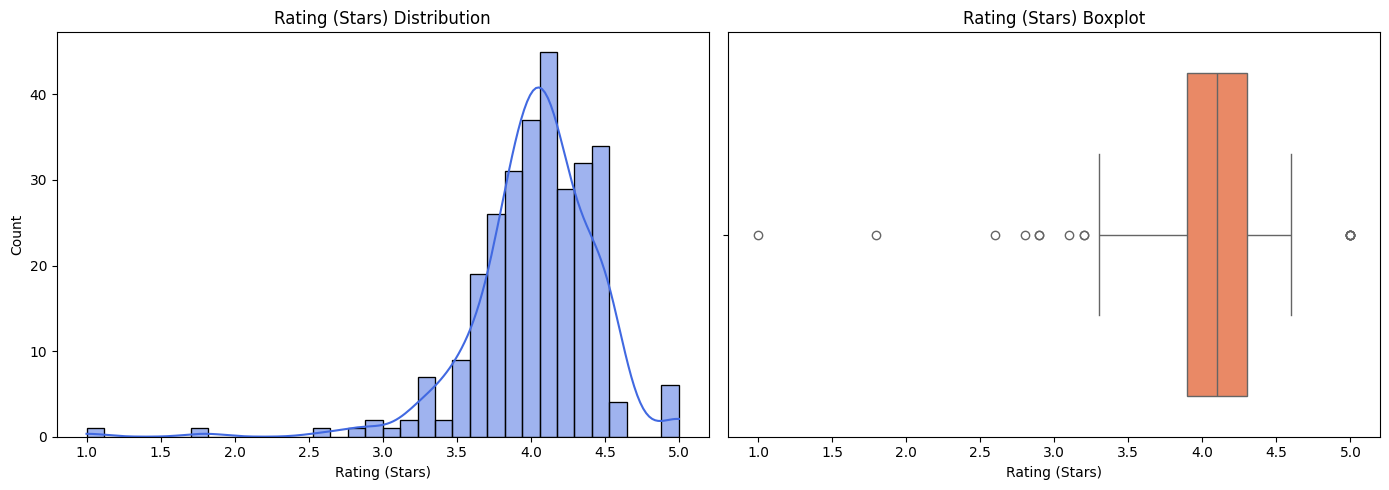

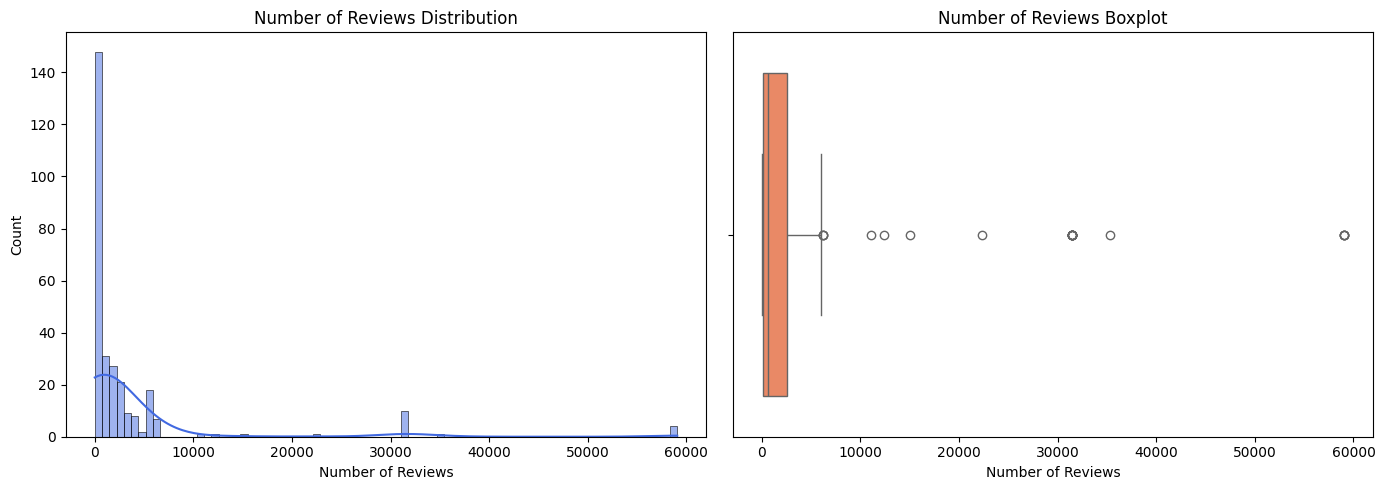

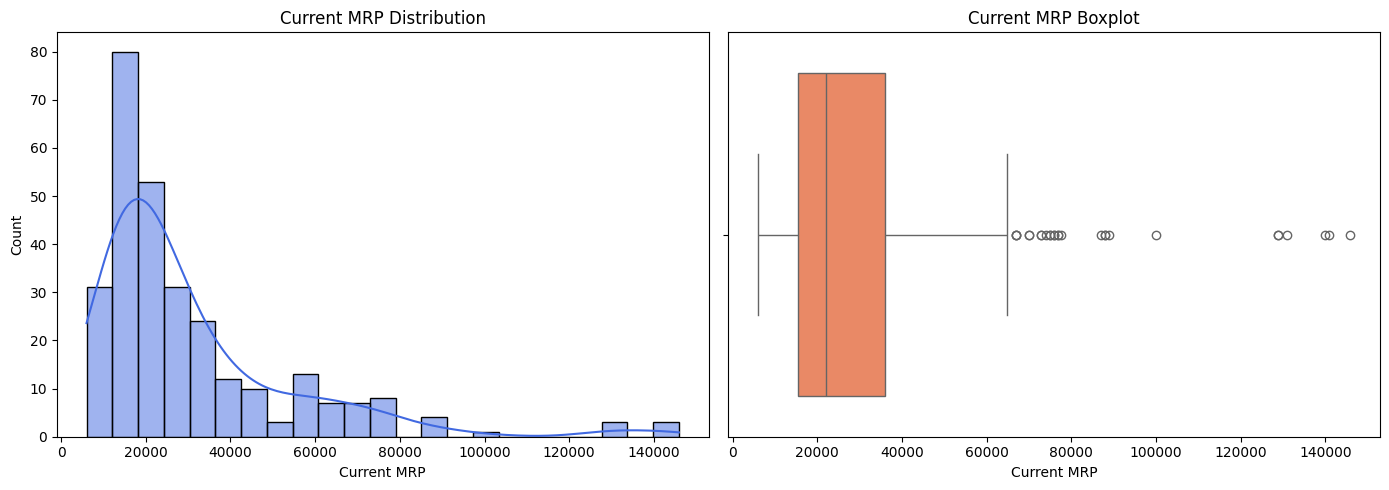

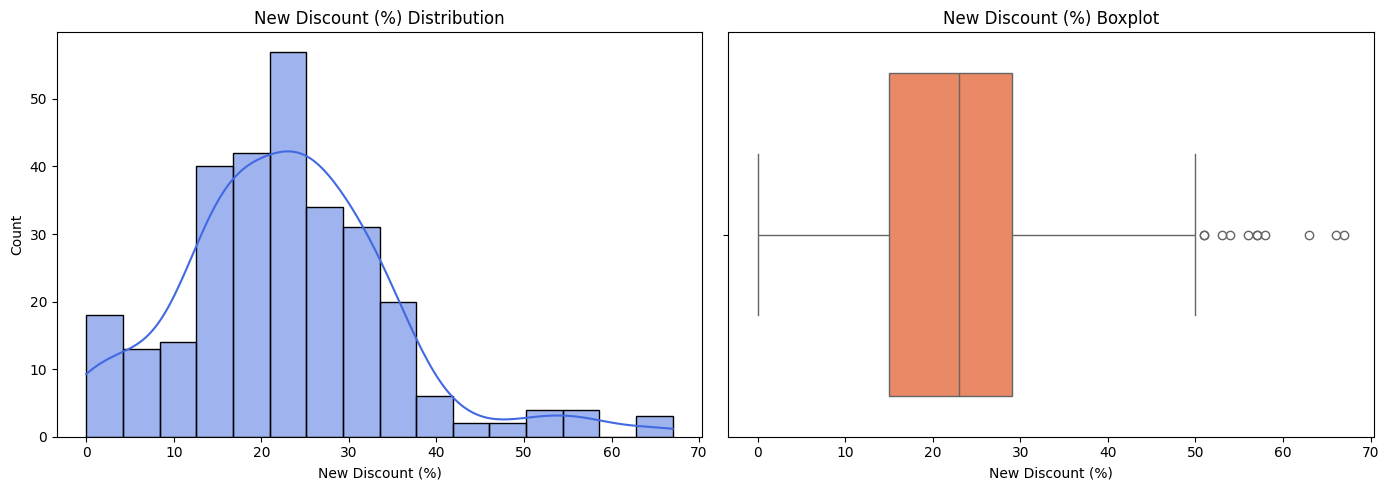

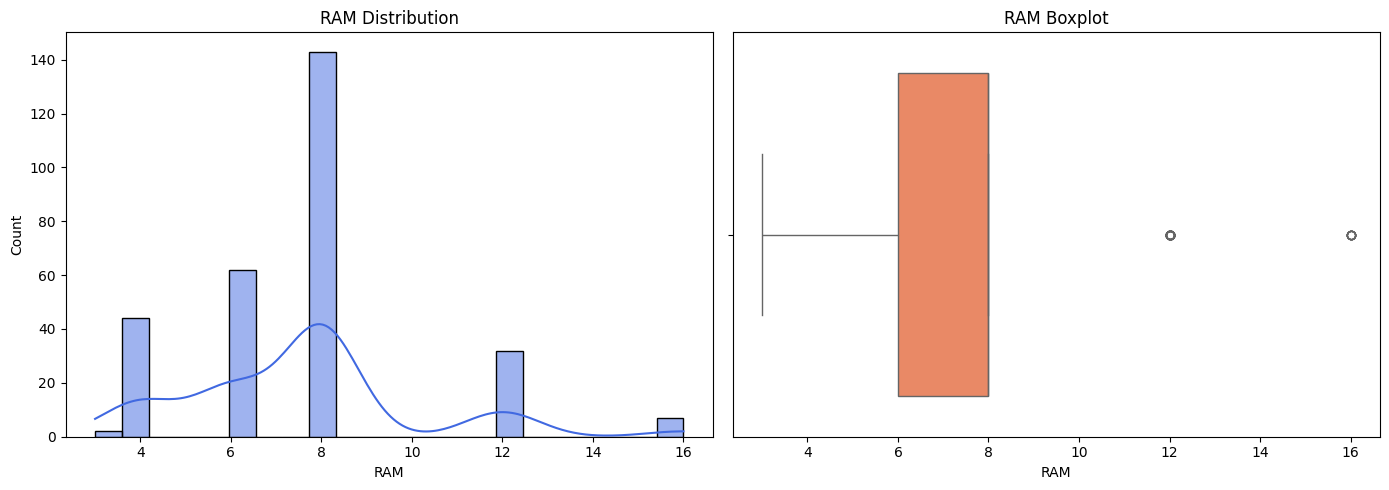

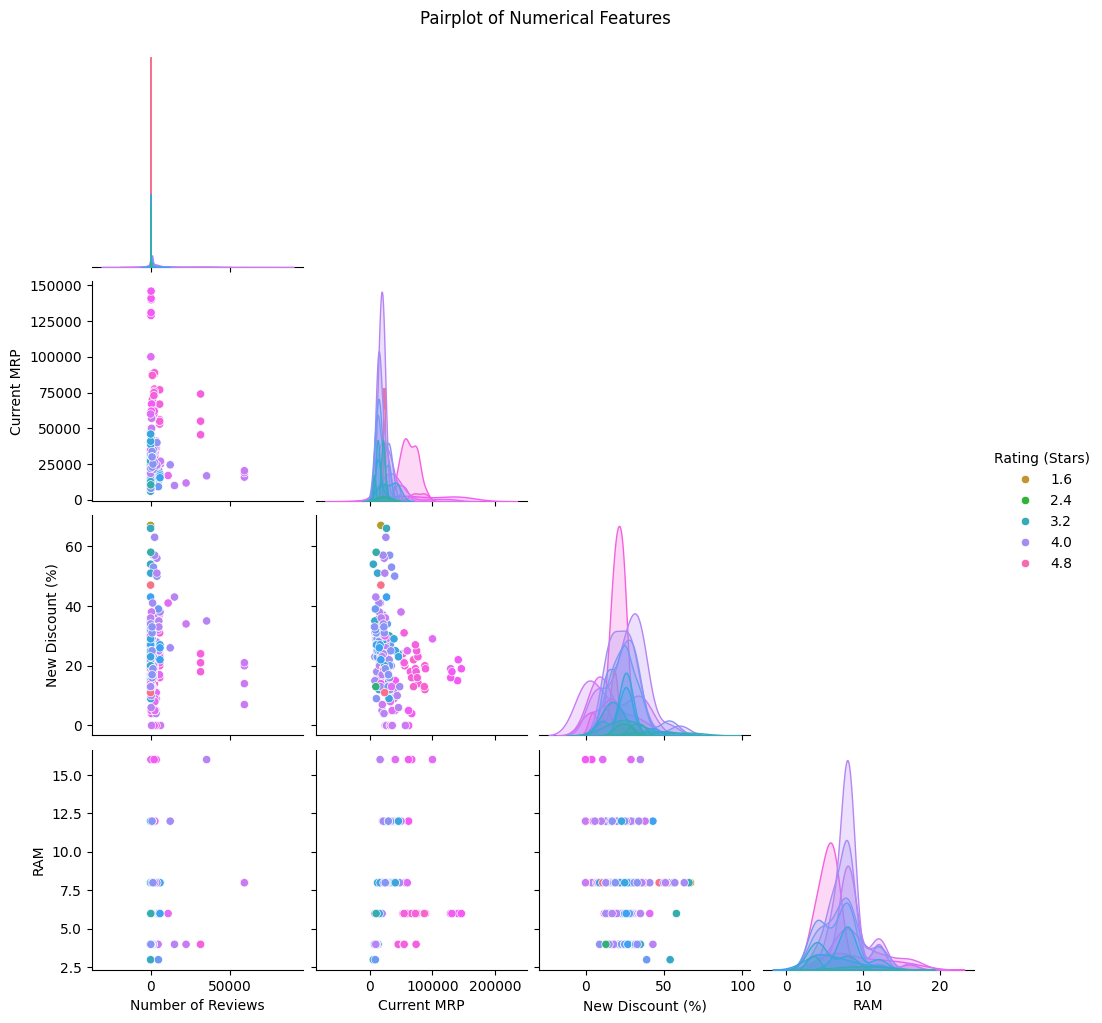

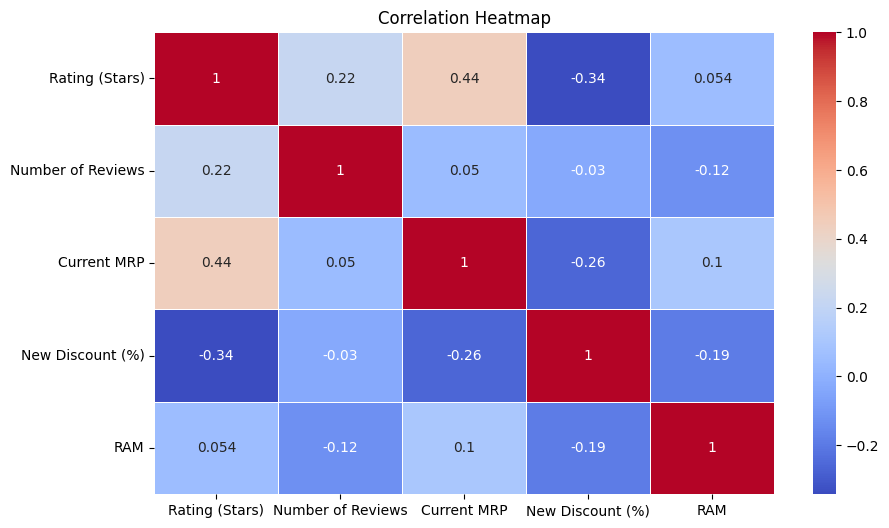

C:\Users\Dell\AppData\Local\Temp\ipykernel_23868\3835935191.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Brand', palette='Spectral')


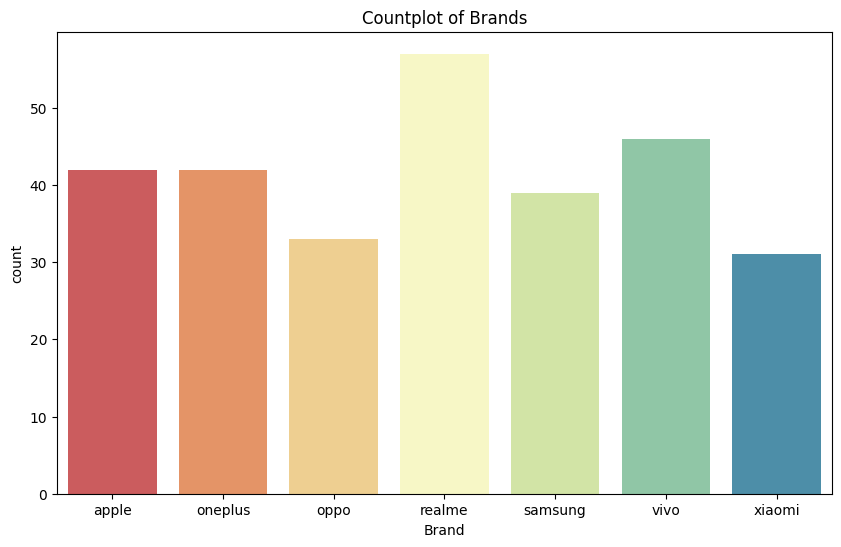

C:\Users\Dell\AppData\Local\Temp\ipykernel_23868\3835935191.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Color', palette='cubehelix')


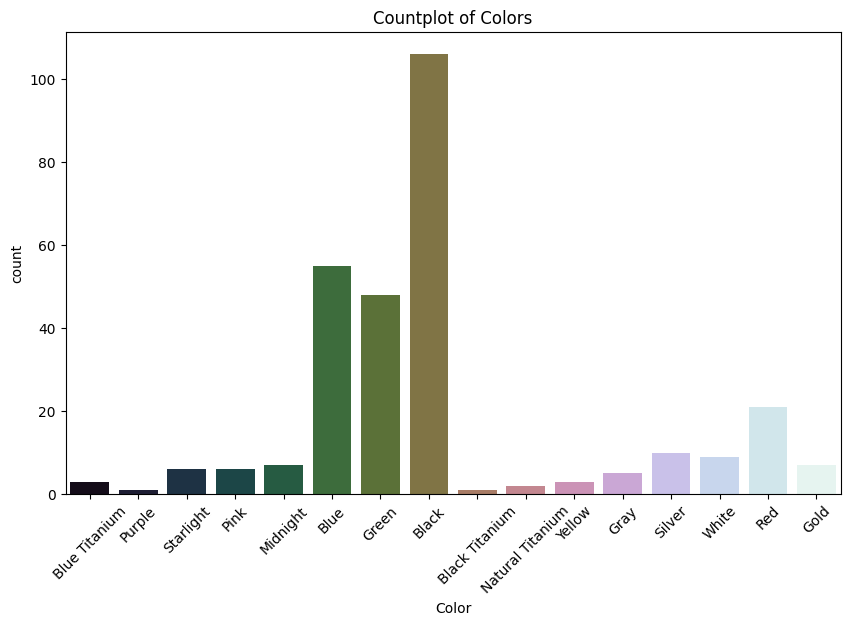

C:\Users\Dell\AppData\Local\Temp\ipykernel_23868\3835935191.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Brand', y='Current MRP', data=df, palette='viridis')


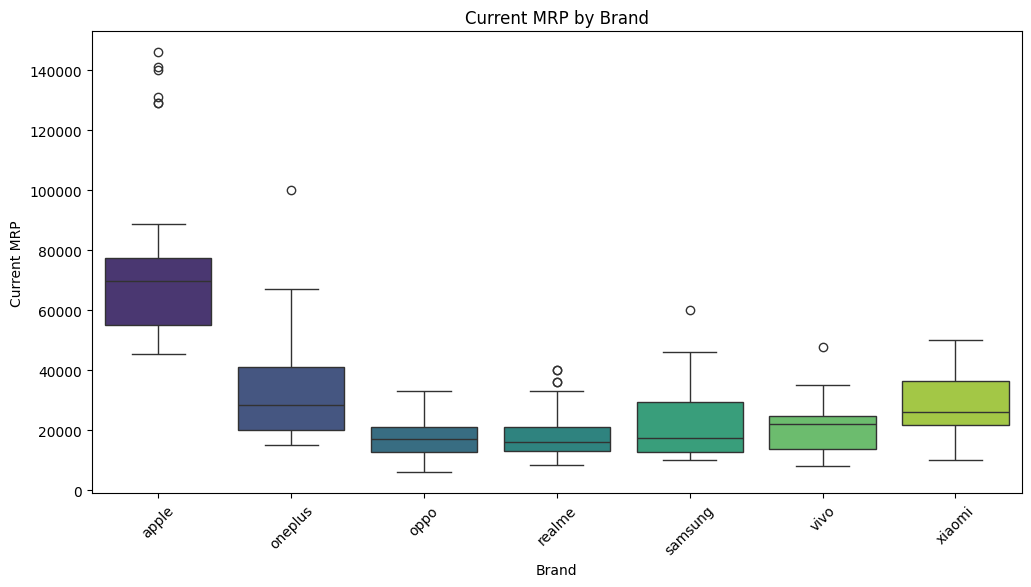

In [37]:
# --- Univariate Analysis ---
# Plotting histograms and boxplots for each numerical feature
numerical_features = ['Rating (Stars)', 'Number of Reviews', 'Current MRP', 'New Discount (%)', 'RAM']

for feature in numerical_features:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Histogram
    sns.histplot(df[feature], kde=True, ax=axes[0], color='royalblue')
    axes[0].set_title(f'{feature} Distribution')
    
    # Boxplot
    sns.boxplot(x=df[feature], ax=axes[1], color='coral')
    axes[1].set_title(f'{feature} Boxplot')
    
    plt.tight_layout()
    plt.show()

# --- Multivariate Analysis ---
# Pairplot to visualize relationships between numerical features
sns.pairplot(df[numerical_features], hue='Rating (Stars)', palette='husl', corner=True)
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()

# Heatmap to visualize correlations between features
plt.figure(figsize=(10, 6))
corr = df[numerical_features].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# --- Categorical Analysis ---
# Countplot for brands
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Brand', palette='Spectral')
plt.title('Countplot of Brands')
plt.show()

# Countplot for color distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Color', palette='cubehelix')
plt.title('Countplot of Colors')
plt.xticks(rotation=45)
plt.show()

# Boxplot for Current MRP by Brand
plt.figure(figsize=(12, 6))
sns.boxplot(x='Brand', y='Current MRP', data=df, palette='viridis')
plt.title('Current MRP by Brand')
plt.xticks(rotation=45)
plt.show()

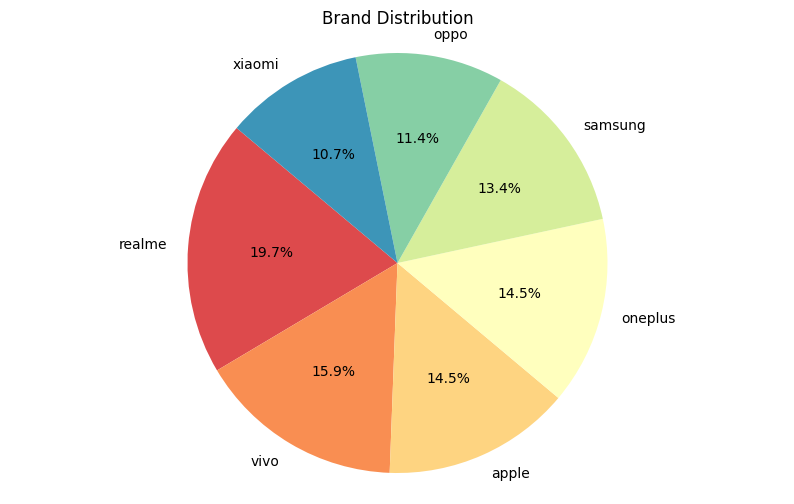

In [38]:
# --- Pie Chart for Brand Distribution ---
plt.figure(figsize=(10, 6))
brand_counts = df['Brand'].value_counts()
plt.pie(brand_counts, labels=brand_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Spectral', len(brand_counts)))
plt.title('Brand Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

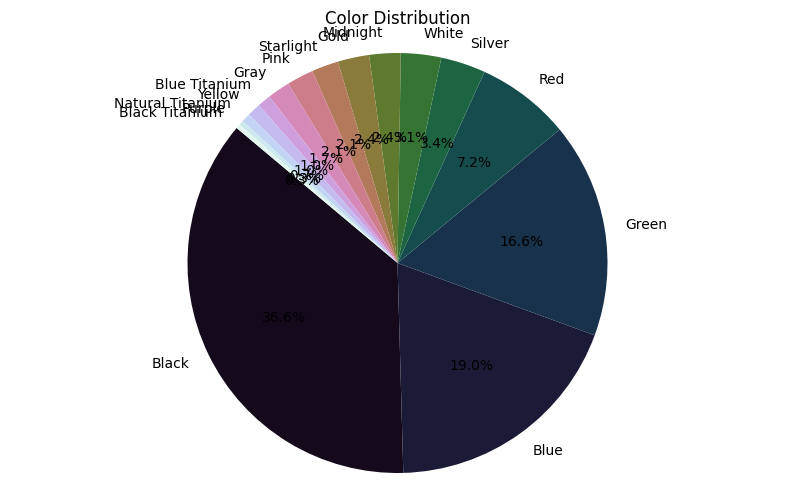

In [39]:
# --- Pie Chart for Color Distribution ---
plt.figure(figsize=(10, 6))
color_counts = df['Color'].value_counts()
plt.pie(color_counts, labels=color_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('cubehelix', len(color_counts)))
plt.title('Color Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

**OUTLIER**

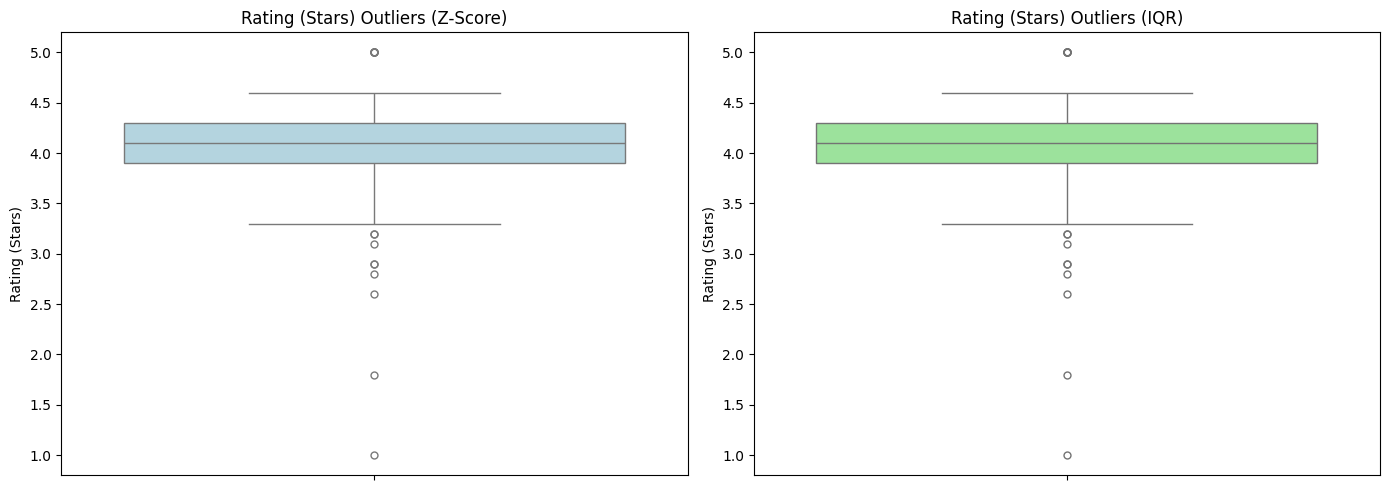

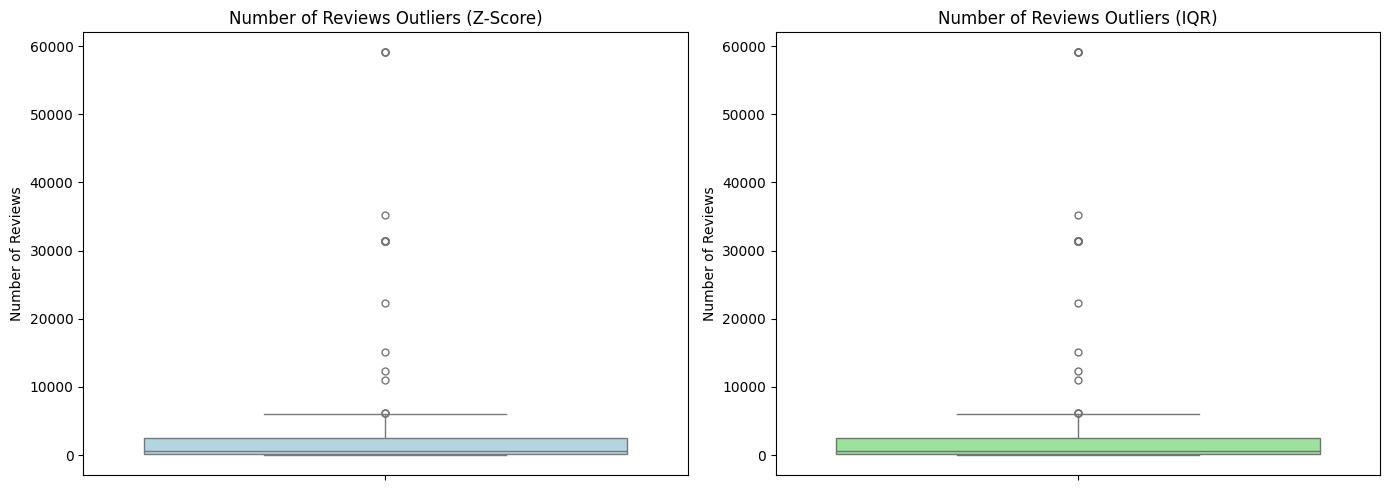

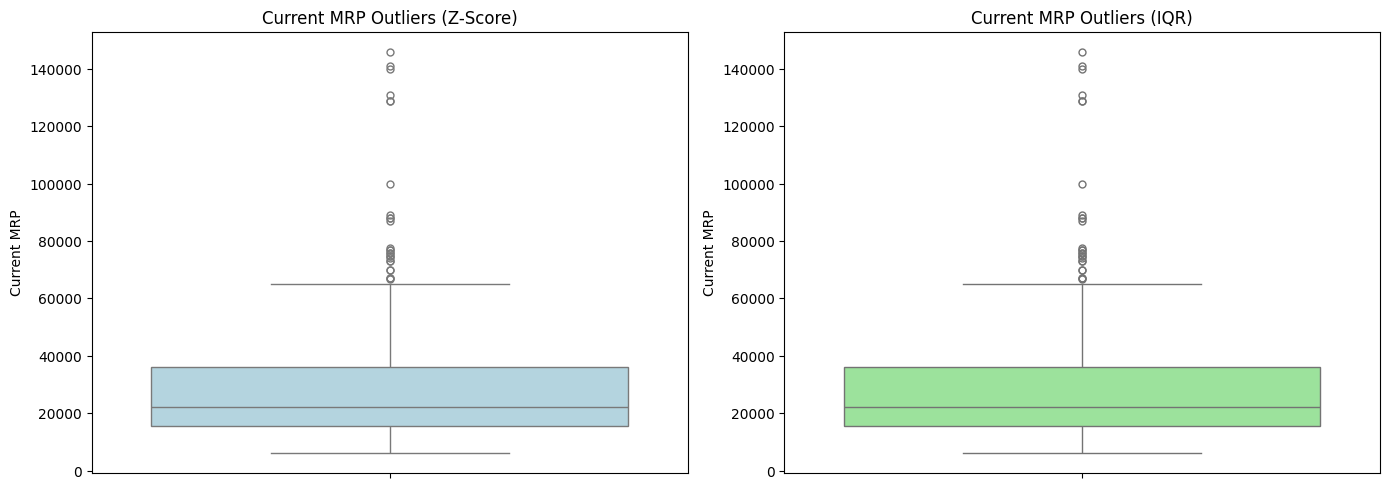

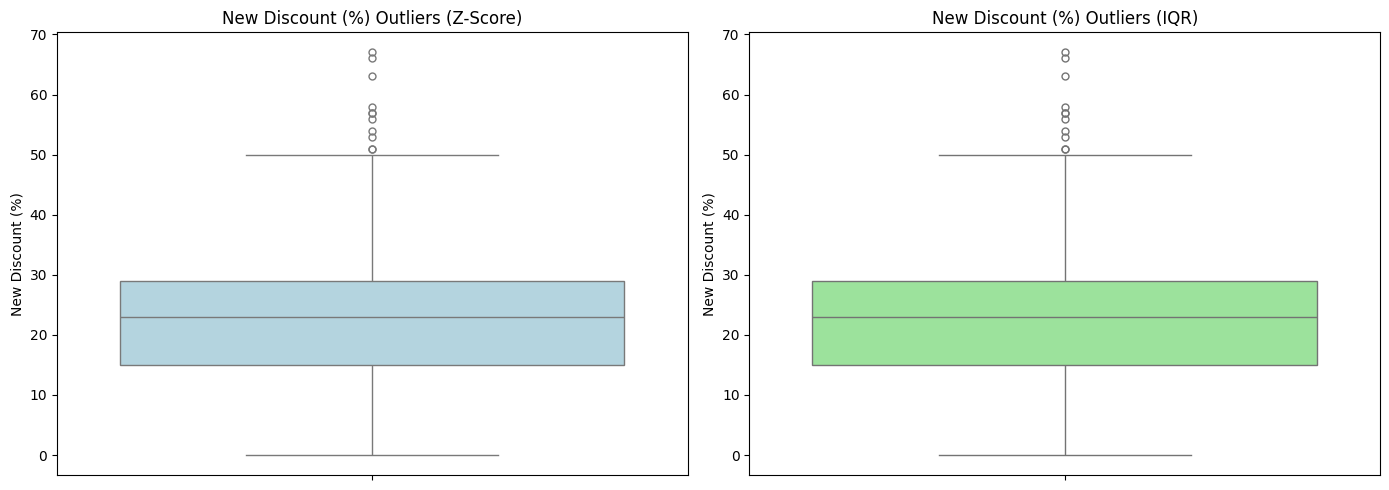

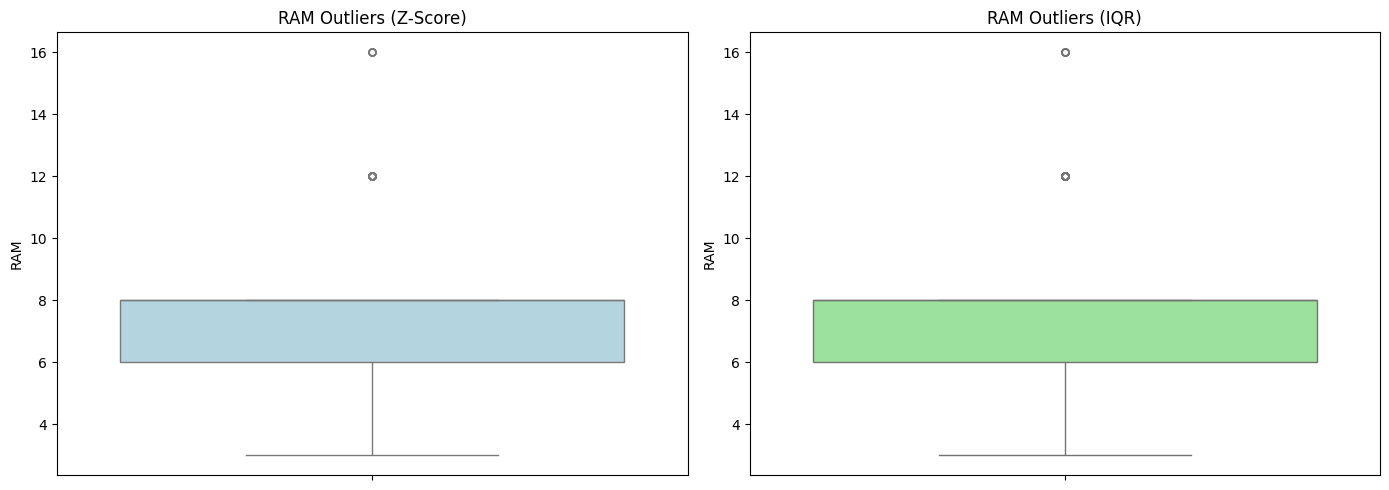

Outliers Detected using Z-score:


,Rating (Stars),Number of Reviews,Current MRP,Free Delivery,Brand,Storage,Color,New Bought Last Month,New Dashed MRP,New Discount (%),RAM,Outlier_Z
0,4.4,364.0,139900.0,1,apple,512.0,Blue Titanium,0,164900.0,15.0,6.0,True
2,4.5,31476.0,45490.0,1,apple,128.0,Starlight,1000,59900.0,24.0,4.0,True
3,4.5,31476.0,45490.0,1,apple,128.0,Pink,500,59900.0,24.0,4.0,True
4,4.5,31476.0,45490.0,1,apple,128.0,Midnight,500,59600.0,24.0,4.0,True
6,4.5,31476.0,45490.0,1,apple,128.0,Blue,500,59600.0,24.0,4.0,True
8,4.5,31476.0,45490.0,1,apple,128.0,Green,400,59600.0,24.0,4.0,True
12,4.5,31476.0,54999.0,0,apple,256.0,Starlight,500,69900.0,21.0,4.0,True
15,4.5,31476.0,54999.0,0,apple,256.0,Midnight,500,69900.0,21.0,4.0,True
21,4.5,31476.0,54999.0,0,apple,256.0,Pink,400,69900.0,21.0,4.0,True
22,4.3,76.0,128900.0,1,apple,256.0,Black Titanium,0,159900.0,19.0,6.0,True


Outliers Detected using IQR:


,Rating (Stars),Number of Reviews,Current MRP,Free Delivery,Brand,Storage,Color,New Bought Last Month,New Dashed MRP,New Discount (%),RAM,Outlier_IQR
0,4.4,364.0,139900.0,1,apple,512.0,Blue Titanium,0,164900.0,15.0,6.0,True
2,4.5,31476.0,45490.0,1,apple,128.0,Starlight,1000,59900.0,24.0,4.0,True
3,4.5,31476.0,45490.0,1,apple,128.0,Pink,500,59900.0,24.0,4.0,True
4,4.5,31476.0,45490.0,1,apple,128.0,Midnight,500,59600.0,24.0,4.0,True
6,4.5,31476.0,45490.0,1,apple,128.0,Blue,500,59600.0,24.0,4.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
283,3.3,11.0,26999.0,1,xiaomi,256.0,Black,0,79999.0,66.0,8.0,True
284,3.9,931.0,29999.0,1,xiaomi,256.0,Black,50,35999.0,17.0,12.0,True
285,4.0,2563.0,25990.0,1,xiaomi,256.0,Black,0,69999.0,63.0,8.0,True
287,3.6,45.0,45999.0,0,xiaomi,512.0,Blue,0,59999.0,23.0,12.0,True


In [40]:
# --- Function to Detect Outliers using Z-Score ---
def detect_outliers_zscore(data, threshold=3):
    """
    Detect outliers based on Z-score.
    Returns a DataFrame with an additional 'Outlier_Z' column.
    """
    z_scores = np.abs(stats.zscore(data.select_dtypes(include=[np.number])))
    outliers = (z_scores > threshold).any(axis=1)
    return data.assign(Outlier_Z=outliers)

# --- Function to Detect Outliers using IQR ---
def detect_outliers_iqr(data):
    """
    Detect outliers based on IQR.
    Returns a DataFrame with an additional 'Outlier_IQR' column.
    """
    numerical_data = data.select_dtypes(include=[np.number])
    Q1 = numerical_data.quantile(0.25)
    Q3 = numerical_data.quantile(0.75)
    IQR = Q3 - Q1
    is_outlier = ((numerical_data < (Q1 - 1.5 * IQR)) | (numerical_data > (Q3 + 1.5 * IQR))).any(axis=1)
    return data.assign(Outlier_IQR=is_outlier)

# Detect outliers using both methods
df_zscore_outliers = detect_outliers_zscore(df)
df_iqr_outliers = detect_outliers_iqr(df)

# --- Box Plots with Outliers Highlighted ---
numerical_features = ['Rating (Stars)', 'Number of Reviews', 'Current MRP', 'New Discount (%)', 'RAM']

# Plotting box plots for Z-score and IQR Outlier Detection
for feature in numerical_features:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Box plot highlighting Z-score detected outliers
    sns.boxplot(
        y=df_zscore_outliers[feature],
        ax=axes[0],
        color='lightblue',
        fliersize=5,
        flierprops={'marker': 'o', 'color': 'red'}
    )
    axes[0].set_title(f'{feature} Outliers (Z-Score)')

    # Box plot highlighting IQR detected outliers
    sns.boxplot(
        y=df_iqr_outliers[feature],
        ax=axes[1],
        color='lightgreen',
        fliersize=5,
        flierprops={'marker': 'o', 'color': 'purple'}
    )
    axes[1].set_title(f'{feature} Outliers (IQR)')
    
    plt.tight_layout()
    plt.show()

# --- Optional: Print Outliers ---
print("Outliers Detected using Z-score:")
display(df_zscore_outliers[df_zscore_outliers['Outlier_Z'] == True])

print("Outliers Detected using IQR:")
display(df_iqr_outliers[df_iqr_outliers['Outlier_IQR'] == True])


**SCALING**

In [41]:
df = pd.read_csv('data_02.csv')
df.drop(["Current MRP"],axis=1,inplace=True)
df.sample(5)

,Rating (Stars),Number of Reviews,Free Delivery,Brand,Storage,Color,New Bought Last Month,New Dashed MRP,New Discount (%),RAM
275,3.9,931.0,1,xiaomi,256.0,White,50,33999.0,31.0,8.0
222,3.7,82.0,0,vivo,128.0,Red,100,15999.0,25.0,4.0
145,4.0,1632.0,1,realme,128.0,Gold,300,13999.0,18.0,4.0
115,3.2,39.0,0,oppo,256.0,Blue,0,24990.0,36.0,8.0
72,4.5,198.0,1,oneplus,256.0,White,100,64999.0,5.0,12.0


```markdown
Feature	Recommended Scaling


rating_stars	    |  Min-Max Scaling

number_of_reviews   |	Standard Scaling

bought_last_month   |	Standard Scaling

original_mrp	    |  Standard Scaling

discount%	    |  Min-Max Scaling

storage_in_GB	    |  Standard Scaling

RAM_in_GB	    |  Standard Scaling


```
> NOW encoding the categorical variables

> Categorical variables are : brand and color

```markdown
Both are encoded using one hot encoding as the are **nominal** variables
```


In [42]:
min_val = df["Rating (Stars)"].min()
max_val = df["Rating (Stars)"].max()
df["Rating (Stars)"] = -1 + (df["Rating (Stars)"] - min_val) / (max_val - min_val) * 2
df["Rating (Stars)"] = df["Rating (Stars)"].round(6)

means = df["Number of Reviews"].mean()
std_devs = df["Number of Reviews"].std()
# Apply manual standard scaling: (value - mean) / std
df["Number of Reviews"] = (df["Number of Reviews"] - means) / std_devs

means = df["New Bought Last Month"].mean()
std_devs = df["New Bought Last Month"].std()
# Apply manual standard scaling: (value - mean) / std
df["New Bought Last Month"] = (df["New Bought Last Month"] - means) / std_devs

means = df["New Dashed MRP"].mean()
std_devs = df["New Dashed MRP"].std()
# Apply manual standard scaling: (value - mean) / std
df["New Dashed MRP"] = (df["New Dashed MRP"] - means) / std_devs

min_val = df["New Discount (%)"].min()
max_val = df["New Discount (%)"].max()
# Scale "New Discount (%)" to range [-1, 1]
df["New Discount (%)"] = -1 + (df["New Discount (%)"] - min_val) / (max_val - min_val) * 2
df["New Discount (%)"] = df["New Discount (%)"].round(6)

means = df["Storage"].mean()
std_devs = df["Storage"].std()
# Apply manual standard scaling: (value - mean) / std
df["Storage"] = (df["Storage"] - means) / std_devs

means = df["RAM"].mean()
std_devs = df["RAM"].std()
# Apply manual standard scaling: (value - mean) / std
df["RAM"] = (df["RAM"] - means) / std_devs

In [43]:
df = pd.get_dummies(df, columns=['Brand'], prefix='Brand')
df = pd.get_dummies(df, columns=['Color'], prefix='Color')
# df.sample(10)

In [45]:
df.columns

Index(['Rating (Stars)', 'Number of Reviews', 'Free Delivery', 'Storage',
       'New Bought Last Month', 'New Dashed MRP', 'New Discount (%)', 'RAM',
       'Brand_apple', 'Brand_oneplus', 'Brand_oppo', 'Brand_realme',
       'Brand_samsung', 'Brand_vivo', 'Brand_xiaomi', 'Color_Black',
       'Color_Black Titanium', 'Color_Blue', 'Color_Blue Titanium',
       'Color_Gold', 'Color_Gray', 'Color_Green', 'Color_Midnight',
       'Color_Natural Titanium', 'Color_Pink', 'Color_Purple', 'Color_Red',
       'Color_Silver', 'Color_Starlight', 'Color_White', 'Color_Yellow'],
      dtype='object')

In [46]:
cols_to_convert = ['Brand_apple', 'Brand_oneplus', 'Brand_oppo', 'Brand_realme',
       'Brand_samsung', 'Brand_vivo', 'Brand_xiaomi', 'Color_Black',
       'Color_Black Titanium', 'Color_Blue', 'Color_Blue Titanium',
       'Color_Gold', 'Color_Gray', 'Color_Green', 'Color_Midnight',
       'Color_Natural Titanium', 'Color_Pink', 'Color_Purple', 'Color_Red',
       'Color_Silver', 'Color_Starlight', 'Color_White', 'Color_Yellow']

df[cols_to_convert] = df[cols_to_convert].astype(int)
df["Free Delivery"].replace(0, -1, inplace=True)
# df.sample(5)

C:\Users\Dell\AppData\Local\Temp\ipykernel_23868\2398036689.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Free Delivery"].replace(0, -1, inplace=True)


In [47]:
df.to_csv('data_03.csv', index=False)

analysis for scaled data

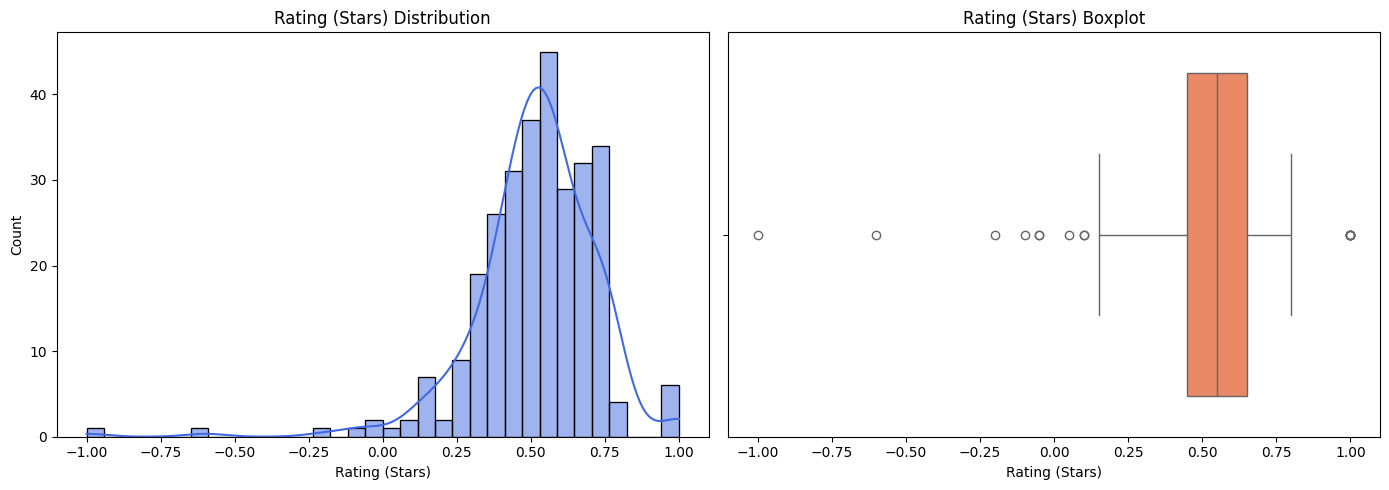

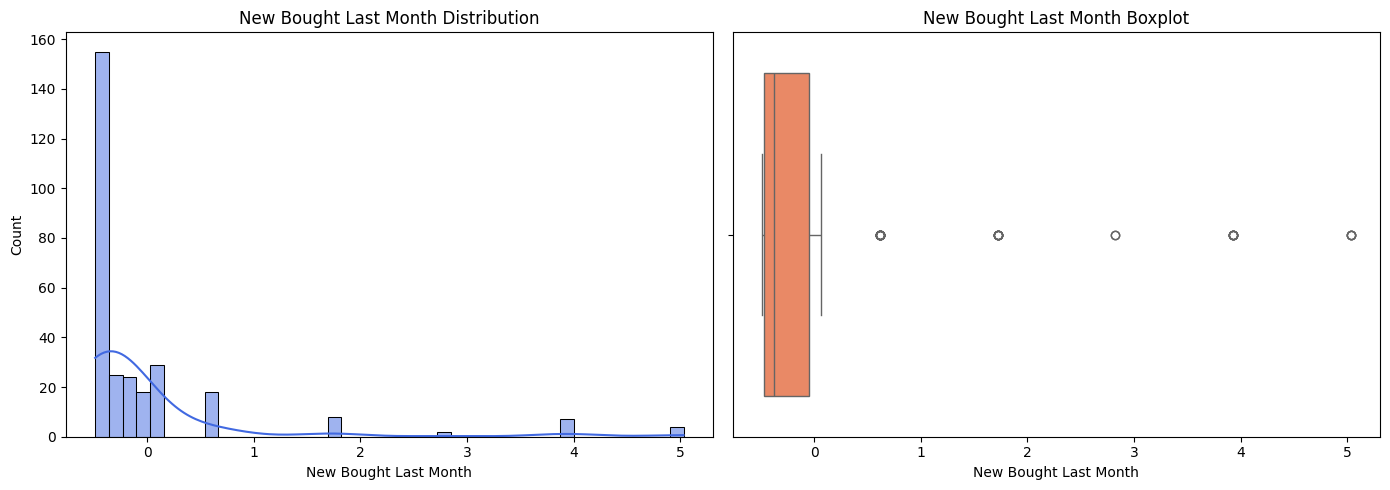

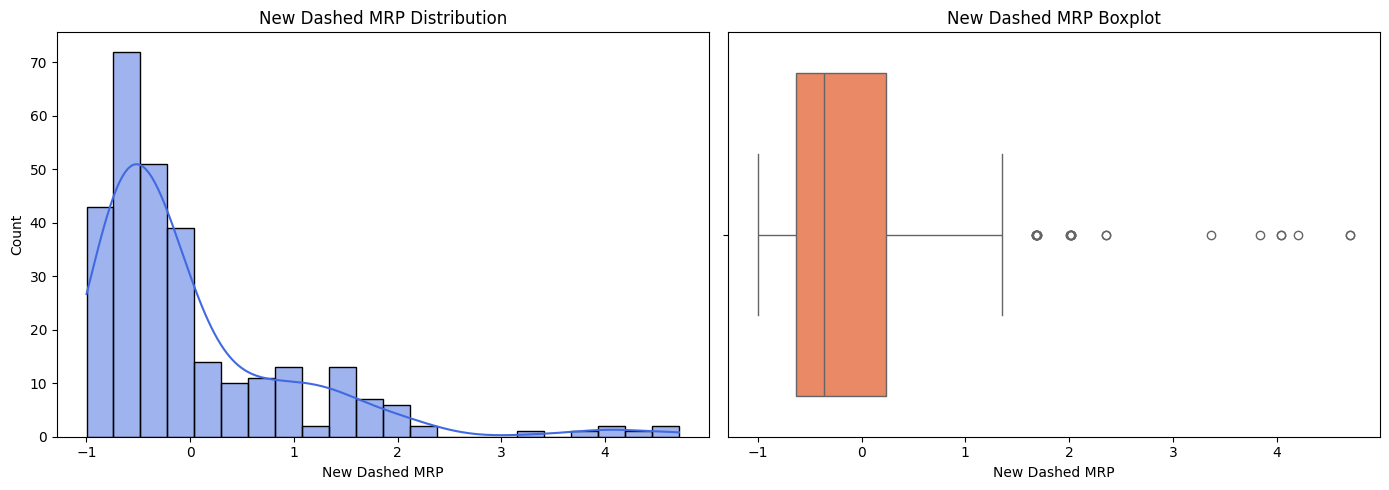

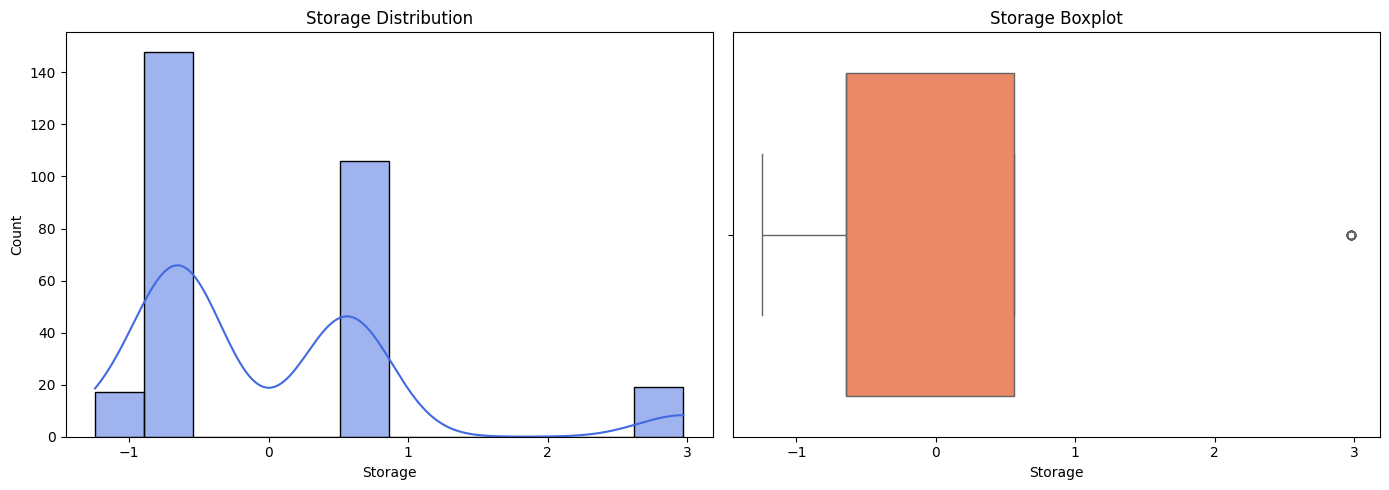

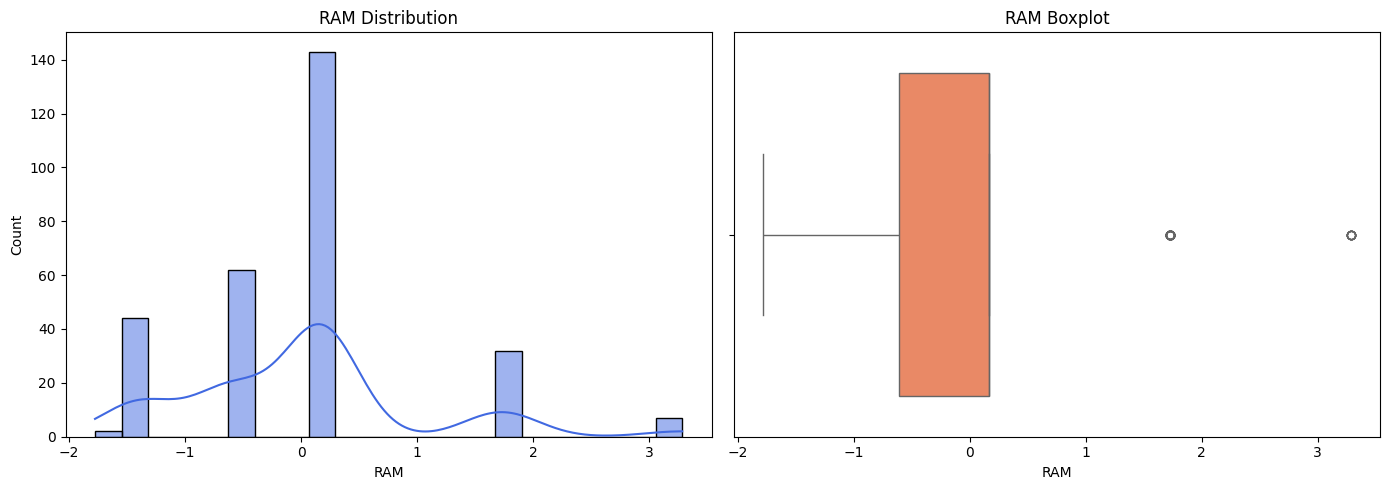

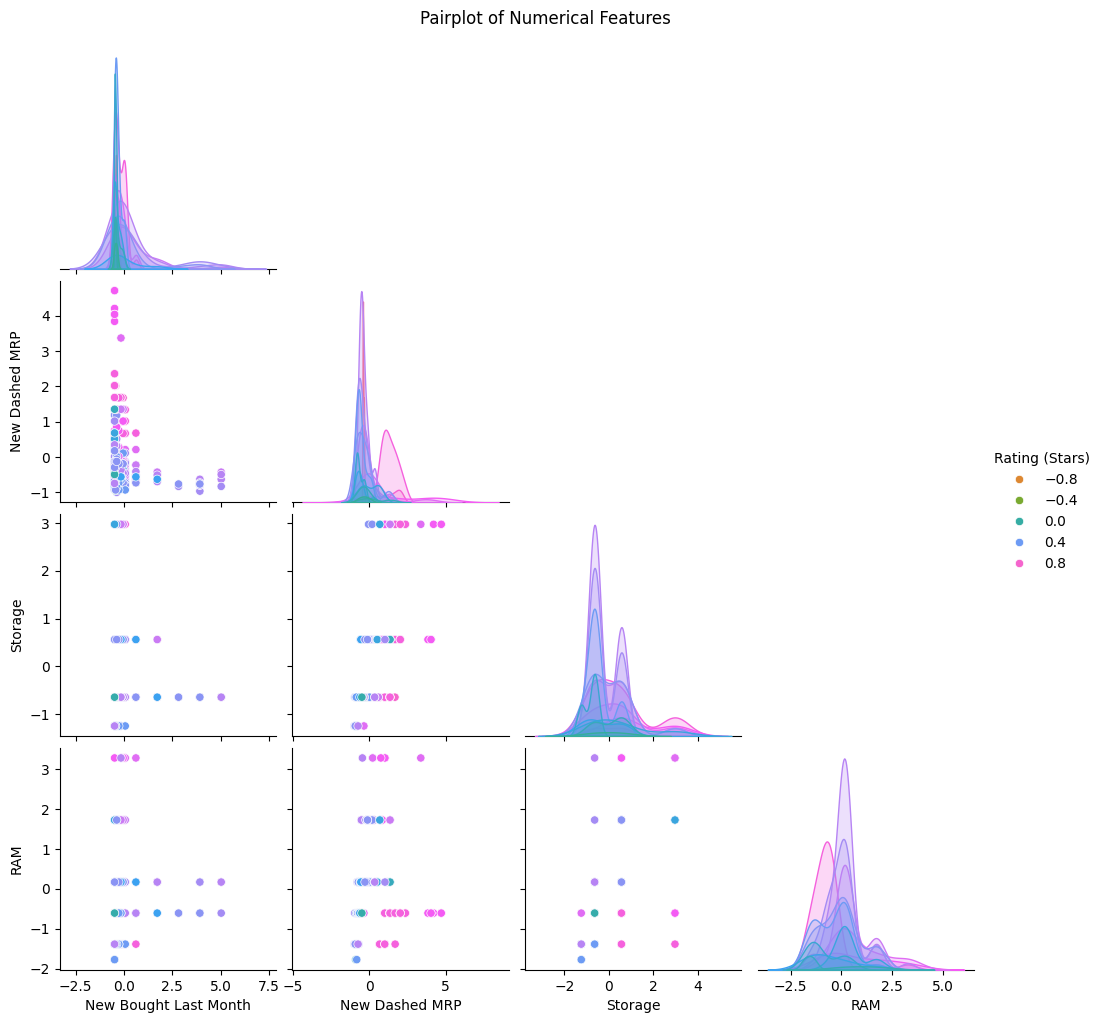

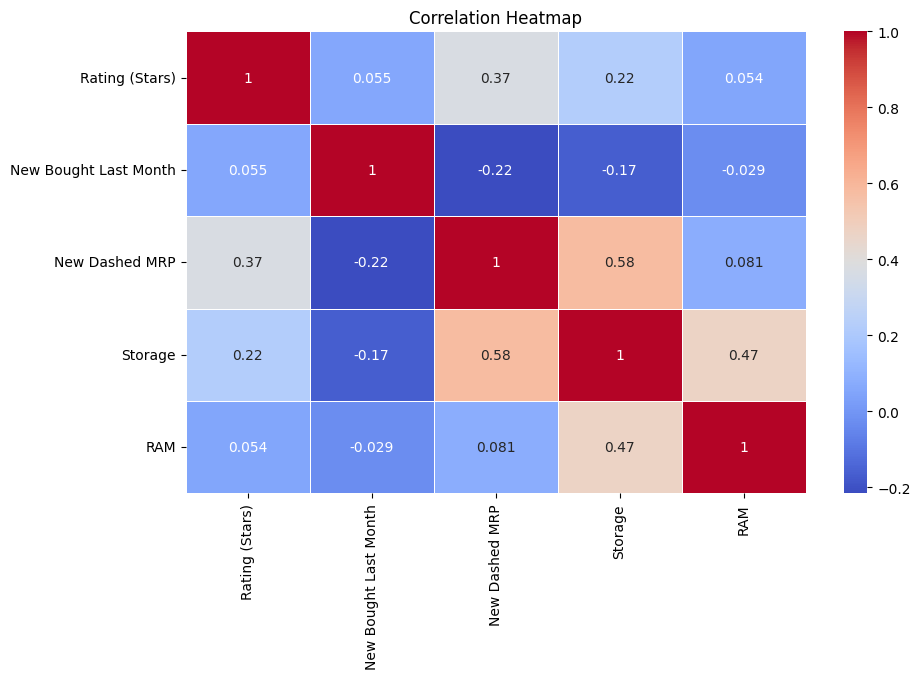

In [48]:
# --- Univariate Analysis ---
# Plotting histograms and boxplots for each numerical feature
numerical_features = ['Rating (Stars)', 'New Bought Last Month', 'New Dashed MRP', 'Storage', 'RAM']

for feature in numerical_features:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Histogram
    sns.histplot(df[feature], kde=True, ax=axes[0], color='royalblue')
    axes[0].set_title(f'{feature} Distribution')
    
    # Boxplot
    sns.boxplot(x=df[feature], ax=axes[1], color='coral')
    axes[1].set_title(f'{feature} Boxplot')
    
    plt.tight_layout()
    plt.show()

# --- Multivariate Analysis ---
# Pairplot to visualize relationships between numerical features
sns.pairplot(df[numerical_features], hue='Rating (Stars)', palette='husl', corner=True)
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()

# Heatmap to visualize correlations between features
plt.figure(figsize=(10, 6))
corr = df[numerical_features].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()



**FEATURE ENGINEERING**

In [49]:
df = pd.read_csv('data_03.csv')
df.head()

,Rating (Stars),Number of Reviews,Free Delivery,Storage,New Bought Last Month,New Dashed MRP,New Discount (%),RAM,Brand_apple,Brand_oneplus,...,Color_Green,Color_Midnight,Color_Natural Titanium,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Starlight,Color_White,Color_Yellow
0,0.70,-0.344660,1,2.973725,-0.489148,4.207323,-0.552239,-0.609400,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0.75,0.245832,1,-0.642125,-0.378714,1.004830,-0.402985,-0.609400,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0.75,3.077088,1,-0.642125,0.615195,0.678868,-0.283582,-1.387928,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0.75,3.077088,1,-0.642125,0.063024,0.678868,-0.283582,-1.387928,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0.75,3.077088,1,-0.642125,0.063024,0.668786,-0.283582,-1.387928,1,0,...,0,1,0,0,0,0,0,0,0,0


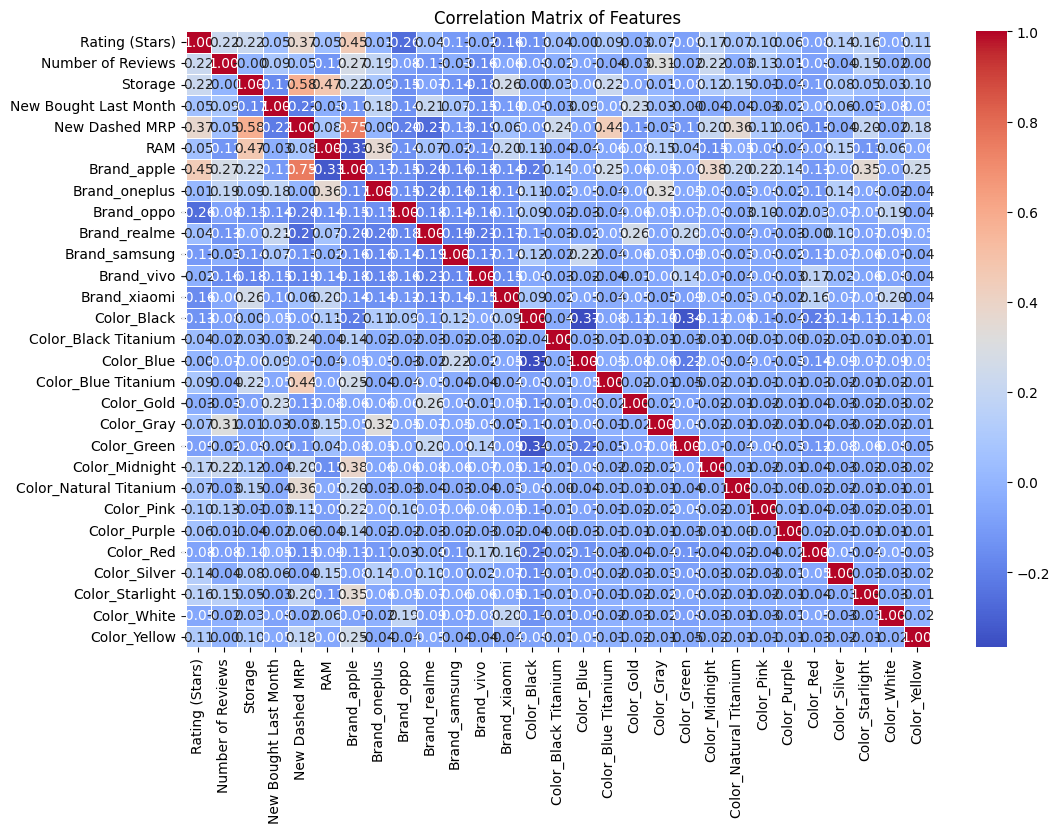

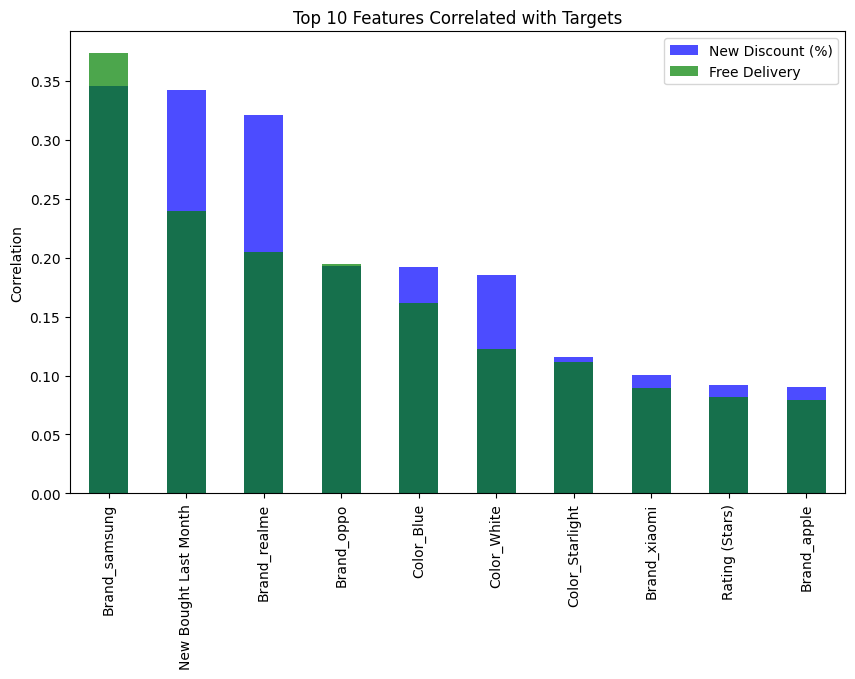

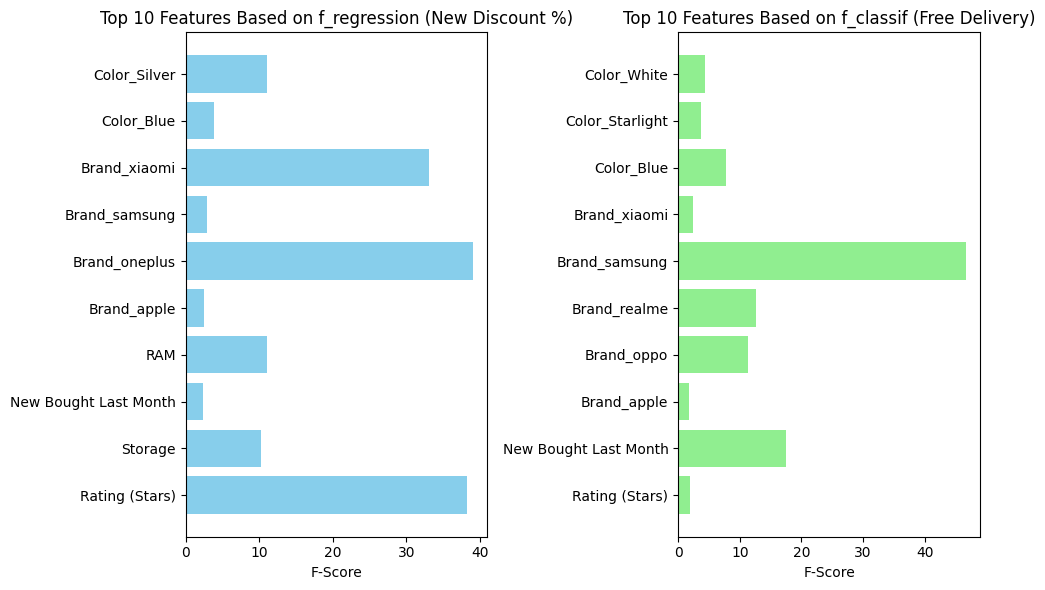

Top 10 Features Based on Correlation with New Discount (%):
Brand_oneplus            0.345500
Rating (Stars)           0.342370
Brand_xiaomi             0.320900
RAM                      0.192637
Color_Silver             0.192168
Storage                  0.185330
Color_Blue               0.115405
Brand_samsung            0.100524
Brand_apple              0.091745
New Bought Last Month    0.090153
dtype: float64

Top 10 Features Based on Correlation with Free Delivery:
Brand_samsung            0.373341
New Bought Last Month    0.239352
Brand_realme             0.204844
Brand_oppo               0.194342
Color_Blue               0.161814
Color_White              0.122488
Color_Starlight          0.111455
Brand_xiaomi             0.089777
Rating (Stars)           0.081851
Brand_apple              0.079297
dtype: float64

Top 10 Features Based on SelectKBest (f_regression) for New Discount (%):
Index(['Rating (Stars)', 'Storage', 'New Bought Last Month', 'RAM',
       'Brand_apple', 'Brand_

In [50]:
# Independent variables (X) and target variables (y)
X = df.drop(columns=['New Discount (%)', 'Free Delivery'])
y_discount = df['New Discount (%)']
y_free_delivery = df['Free Delivery']

### Step 1: Correlation Matrix ###
# Calculate correlation with both target variables
corr_discount = X.corrwith(y_discount).abs().sort_values(ascending=False)
corr_delivery = X.corrwith(y_free_delivery).abs().sort_values(ascending=False)

# Select top 10 features based on correlation
top10_corr_discount = corr_discount.head(10)
top10_corr_delivery = corr_delivery.head(10)

# Plot Correlation Heatmap for features and the target variables
plt.figure(figsize=(12, 8))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Features")
plt.show()

# Plot Correlation with target variables
plt.figure(figsize=(10, 6))
top10_corr_discount.plot(kind='bar', color='blue', alpha=0.7, label='New Discount (%)')
top10_corr_delivery.plot(kind='bar', color='green', alpha=0.7, label='Free Delivery')
plt.title("Top 10 Features Correlated with Targets")
plt.ylabel('Correlation')
plt.legend()
plt.show()

### Step 2: SelectKBest ###

# Using f_regression for regression target (New Discount %)
selector_reg = SelectKBest(score_func=f_regression, k=10)
selector_reg.fit(X, y_discount)
top10_regression_features = X.columns[selector_reg.get_support()]
top10_reg_scores = selector_reg.scores_[selector_reg.get_support()]

# Using f_classif for classification target (Free Delivery)
selector_classif = SelectKBest(score_func=f_classif, k=10)
selector_classif.fit(X, y_free_delivery)
top10_classification_features = X.columns[selector_classif.get_support()]
top10_classif_scores = selector_classif.scores_[selector_classif.get_support()]

# Plot bar plot for SelectKBest scores
plt.figure(figsize=(10, 6))

# For f_regression (New Discount %)
plt.subplot(1, 2, 1)
plt.barh(top10_regression_features, top10_reg_scores, color='skyblue')
plt.title("Top 10 Features Based on f_regression (New Discount %)")
plt.xlabel("F-Score")

# For f_classif (Free Delivery)
plt.subplot(1, 2, 2)
plt.barh(top10_classification_features, top10_classif_scores, color='lightgreen')
plt.title("Top 10 Features Based on f_classif (Free Delivery)")
plt.xlabel("F-Score")

plt.tight_layout()
plt.show()

# --- Print Results ---
print("Top 10 Features Based on Correlation with New Discount (%):")
print(top10_corr_discount)

print("\nTop 10 Features Based on Correlation with Free Delivery:")
print(top10_corr_delivery)

print("\nTop 10 Features Based on SelectKBest (f_regression) for New Discount (%):")
print(top10_regression_features)

print("\nTop 10 Features Based on SelectKBest (f_classif) for Free Delivery:")
print(top10_classification_features)


In [51]:
# Random Forest Regressor - Predicting New Discount %
# Selected Features for Regression
features_regression = ['Rating (Stars)', 'Number of Reviews', 'Storage',
                       'New Bought Last Month', 'RAM', 'Brand_oneplus', 'Brand_xiaomi',
                       'Color_Blue', 'Color_Red', 'Color_Silver']
X_regression = df[features_regression]
y_regression = df['New Discount (%)']

# Split the data into training and testing sets for regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_regression, y_regression, test_size=0.2, random_state=42)

# Create the Random Forest model for regression
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_reg.fit(X_train_reg, y_train_reg)

# Make predictions
y_pred_rf = rf_reg.predict(X_test_reg)

# Calculate Mean Squared Error (MSE)
mse_rf = mean_squared_error(y_test_reg, y_pred_rf)
print(f"Mean Squared Error (Random Forest) for New Discount (%): {mse_rf:.4f}")


# Logistic Regression - Predicting Free Delivery
# Selected Features for Classification
features_classification = ['Number of Reviews', 'Storage', 'New Bought Last Month', 'RAM',
                           'Brand_oneplus', 'Brand_oppo', 'Brand_samsung', 'Brand_vivo',
                           'Brand_xiaomi', 'Color_Green']
X_classification = df[features_classification]
y_classification = df['Free Delivery']

# Split the data into training and testing sets for classification
X_train_fd, X_test_fd, y_train_fd, y_test_fd = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)

# Create the Logistic Regression model for classification
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
log_reg.fit(X_train_fd, y_train_fd)

# Make predictions
y_pred_log_reg = log_reg.predict(X_test_fd)

# Calculate the accuracy for classification
accuracy_log_reg = accuracy_score(y_test_fd, y_pred_log_reg)
print(f"Accuracy (Logistic Regression) for Free Delivery: {accuracy_log_reg:.4f}")


Mean Squared Error (Random Forest) for New Discount (%): 0.0954
Accuracy (Logistic Regression) for Free Delivery: 0.6379


In [52]:
import joblib
import pickle

# Export Random Forest Model for New Discount %
joblib.dump(rf_reg, 'random_forest_discount_model.pkl')  # Using joblib for RandomForest

# Export Logistic Regression Model for Free Delivery
pickle.dump(log_reg, open('logistic_regression_free_delivery_model.pkl', 'wb'))  # Using pickle for LogisticRegression


In [ ]:
# When want to load it at some place, use the following code:

# # Load the Random Forest model (for New Discount %)
# rf_reg_loaded = joblib.load('random_forest_discount_model.pkl')

# # Load the Logistic Regression model (for Free Delivery)
# log_reg_loaded = pickle.load(open('logistic_regression_free_delivery_model.pkl', 'rb'))
